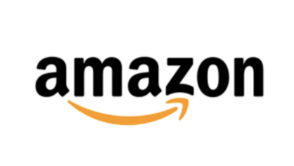

# **Impact of Discounts on Amazon Sales & Customer Analysis**

## **Background**
Amazon is one of the largest e-commerce platforms, offering a wide range of products with frequent discounts and promotions. However, despite providing significant discounts across various categories, data suggests that **higher discounts do not always result in better customer satisfaction**. Some products with bigger discounts still receive **lower ratings**, which raises important questions about:
- **Customer perception** of discounted products  
- **Product quality concerns** at higher discount rates  
- **Purchasing behavior** and its relationship with discount strategies  

Additionally, Amazon wants to **optimize its discount strategies** for high-ticket items (expensive products) to ensure that customers are satisfied with their purchases. The company also needs insights into:
- **Which product categories benefit the most from discounts**  
- **How customer feedback can improve overall sales and shopping experiences**  

This analysis will help Amazon make **data-driven decisions** to enhance customer satisfaction and maximize revenue.


## 1. Importing data

In [155]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
amazon = pd.read_csv('/content/drive/MyDrive/Data Analyst A - Z/Python/Data files/Project 1 - Amazon/amazon.csv')

## 2. Data preparation

**Steps to consider: **
- Data cleaning (missing values, outliers)
- Data check (data type, inconsistency)
- Data Transformation (create necessary columns for futher analysis)

*   **OVERAL DATA INFO**

In [157]:
#Check data's general info for a quick overview of the dataset

amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [158]:
amazon.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...




> Since data's statistics are unable to pulled out correctly due to data's types are all object/string, updating data's type will firstly executed then checking data's statistics

*   **DATA TYPES**

In [159]:
#Update data types for columns that are supposed to be numerical and remove symbols within those columns for analysing.

def clean_and_convert(column):
    column = column.replace({'\₹': '', ',': ''}, regex=True)
    if column.str.contains('%').any():
        column = column.replace('%', '', regex=True).astype(float)
    else:
        column = column.astype(float)
    return column

amazon['discounted_price'] = clean_and_convert(amazon['discounted_price'])
amazon['actual_price'] = clean_and_convert(amazon['actual_price'])
amazon['discount_percentage'] = clean_and_convert(amazon['discount_percentage'])

#Re-check data types
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   object 
 7   rating_count         1463 non-null   object 
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [160]:
#Rating is unbale to convert to float since it contains '|' symbol somewhere in the column
#Count distinct values to see if there is any error
amazon['rating'].value_counts()

,count
rating,
4.1,244
4.3,230
4.2,228
4.0,129
3.9,123
4.4,123
3.8,86
4.5,75
4,52


In [161]:
#Drop that | symbol in rating column
amazon['rating'] = amazon['rating'].str.replace('|', '', regex=False)   #regex = False: only replaces exact matches of the string or value specified

#Convert to float data type
amazon['rating'] = pd.to_numeric(amazon['rating'], errors='coerce')  #errors ='coerce': Invalid parsing will be set to NaN (Not a Number)

#Re-check data
amazon['rating'].value_counts()

,count
rating,
4.1,244
4.3,230
4.2,228
4.0,181
3.9,123
4.4,123
3.8,86
4.5,75
3.7,42


In [162]:
#Re-check the data
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   object 
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [163]:
#Rating_count is unable to convert directly to integer since there are ',' symbol somwhere in the column
#Replace ',' with '' and update to int data type
amazon['rating_count'] = pd.to_numeric(amazon['rating_count'].str.replace(',', '', regex=False), errors='coerce').astype('Int64')

#Re-check the data
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   Int64  
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

*   **MISSING VALUES**

In [164]:
#Find missing values
amazon.isnull().sum()   #2 null values in rating_count #too small

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,1
rating_count,2
about_product,0
user_id,0


In [165]:
#Drop all missing values since it's only a small propotion which will not lead to bias results
amazon.dropna(inplace = True)    #inplace = True: modifies the original DataFrame or Series in place and does not return anything

#Re-check the data
amazon.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,0
about_product,0
user_id,0


*   **NOISE/OUTLIERS**

<Axes: >

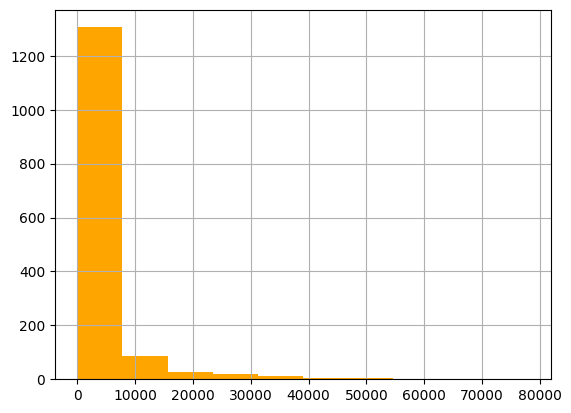

In [166]:
#Find outliers
amazon['discounted_price'].hist(color = 'orange')

<Axes: >

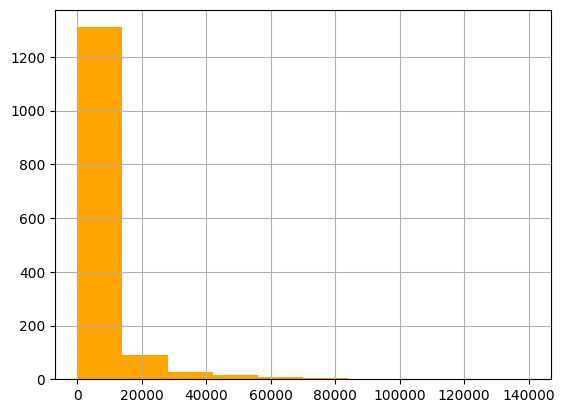

In [167]:
amazon['actual_price'].hist(color = 'orange')

<Axes: >

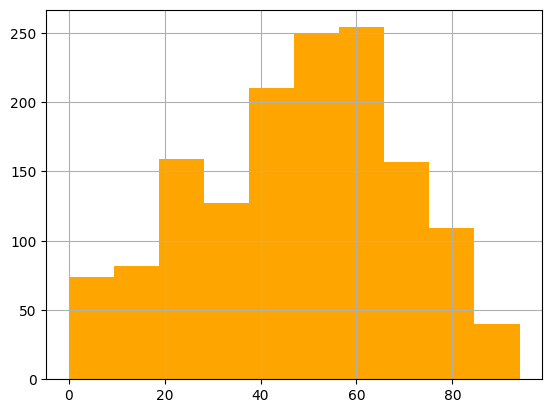

In [168]:
amazon['discount_percentage'].hist(color = 'orange')

<Axes: >

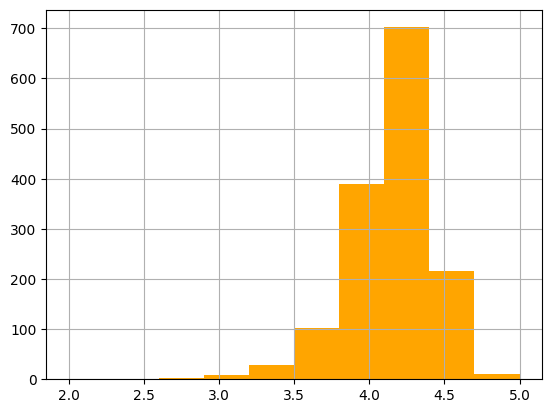

In [169]:
amazon['rating'].hist(color = 'orange')

<Axes: >

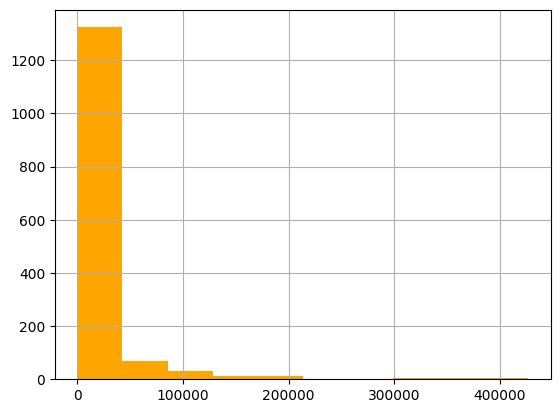

In [170]:
amazon['rating_count'].hist(color = 'orange')

*   **DUPLICATES**

In [171]:
#Find duplicates in general
amazon.duplicated().sum()

np.int64(0)

In [172]:
#Find duplicated product_id since each should be unique
product_id = amazon['product_id'].value_counts()
product_id

#It looks suspicious....

,count
product_id,
B08DDRGWTJ,3
B08WRWPM22,3
B08CF3D7QR,3
B082T6V3DT,3
B08Y1TFSP6,3
...,...
B09JS94MBV,1
B0B5GF6DQD,1
B0BD92GDQH,1


In [173]:
#Take out only duplicated product id to double check since it shall be unique each
duplicated_id = product_id[product_id != 1]
duplicated_id

,count
product_id,
B08DDRGWTJ,3
B08WRWPM22,3
B08CF3D7QR,3
B082T6V3DT,3
B08Y1TFSP6,3
...,...
B0789LZTCJ,2
B0B4DT8MKT,2
B00NH11KIK,2


In [174]:
#Overview of data with duplicated product id
amazon[amazon['product_id'].isin(duplicated_id.index)].sort_values('product_id',ascending = True)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
46,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,507.0,1208.0,58.0,4.1,8131,Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/I/31+NwZ8gb1...,https://www.amazon.in/D-Link-DWA-131-Wireless-...
881,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,507.0,1208.0,58.0,4.1,8131,Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/D-Link-DWA-131-Wireless-...
33,B008FWZGSG,Samsung Original Type C to C Cable - 3.28 Feet...,Computers&Accessories|Accessories&Peripherals|...,599.0,599.0,0.0,4.3,355,USB Type-C to Type-C cable with universal comp...,"AEQWVGESA7TDGK7KZ4DAJQGYH32A,AECGAMNNIMW5QOPOB...","Verified Buyer,Avishek Majumdar,Drowna roy,mah...","R2Z9ENI1BK4EAB,R2JTBG4GO7WPMG,R3GKCN4UH999M8,R...","Good,Genuine product,Not first charge this cab...","Buy it,Received in good condition and is worki...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Samsung-Original-Type-Ca...
833,B008FWZGSG,Samsung Original Type C to C Cable - 3.28 Feet...,Computers&Accessories|Accessories&Peripherals|...,599.0,599.0,0.0,4.3,355,USB Type-C to Type-C cable with universal comp...,"AEQWVGESA7TDGK7KZ4DAJQGYH32A,AECGAMNNIMW5QOPOB...","Verified Buyer,Avishek Majumdar,Drowna roy,mah...","R2Z9ENI1BK4EAB,R2JTBG4GO7WPMG,R3GKCN4UH999M8,R...","Good,Genuine product,Not first charge this cab...","Buy it,Received in good condition and is worki...",https://m.media-amazon.com/images/I/11ICusapw3...,https://www.amazon.in/Samsung-Original-Type-Ca...
40,B00NH11KIK,AmazonBasics USB 2.0 Cable - A-Male to B-Male ...,Computers&Accessories|Accessories&Peripherals|...,209.0,695.0,70.0,4.5,107687,One 6-foot-long (1.8 meters) high-speed multi-...,"AEYHTCWWZYU3JQBU6SLNFFT3OMVQ,AENQPV63OVBZHJ7L7...","Shiva,Uzef,kottala samuel,Renjith,Dhivakaran,M...","R2AE3BN2Y58N55,R6YVRITBSRECR,R232KD83Q3MVML,R2...","Functionality as described,Working,Great USB i...","Using it and satisfactory.,Working good also n...",https://m.media-amazon.com/images/I/4101vlzySz...,https://www.amazon.in/AmazonBasics-USB-2-0-Cab...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,B0BDRVFDKP,"SanDisk Ultra® microSDXC™ UHS-I Card, 64GB, 14...",Electronics|Accessories|MemoryCards|MicroSD,569.0,1000.0,43.0,4.4,67262,Ideal storage for Android smartphones and tabl...,"AG44HJB2AMIVHAGQZ2WGWONERKCA,AHL2FABQV6XAHZN54...","Prashant,Sumesh Sundararajan,Vijay Baitha,S.k ...","R2A7MIUNOW8DOE,R2FXP703540FR1,R37E7QJET0BYE8,R...","Fake Product,Costly but excellent quality,Stor...",128GB SD Card is showing 134GBDon't buy this p...,https://m.media-amazon.com/images/I/41ML8ZbPii...,https://www.amazon.in/SanDisk-Ultra%C2%AE-micr...
908,B0BFWGBX61,Ambrane Unbreakable 3A Fast Charging Braided T...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.1,314,"Compatible with all Type C enabled devices, be...","AF36YUJUEUU3SA42PFAULM2F5RYA,AESE26BMILSD6E4AV...","Vipan Agnihotri,Hitender singh,Anuj Chauhan,Mu...","RQAF3Q7KCEGHP,R3CBLDFSRTKKYA,R3PZ3ENFIS7IJG,R2...","Good product,Strong and powerful,Useful produc...","quality is ok ok only,Well go for it goo

In [175]:
#Filters out the rows where product_id is duplicated, keeping only the unique rows.
amazon = amazon[amazon.duplicated('product_id', keep = False) == False]

In [176]:
amazon['product_id'].value_counts()

,count
product_id,
B01486F4G6,1
B008IFXQFU,1
B0B6F7LX4C,1
B0B1YVCJ2Y,1
B08B42LWKN,1
...,...
B01N90RZ4M,1
B07MKFNHKG,1
B0711PVX6Z,1


In [177]:
#Re-check data info
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1256 entries, 8 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1256 non-null   object 
 1   product_name         1256 non-null   object 
 2   category             1256 non-null   object 
 3   discounted_price     1256 non-null   float64
 4   actual_price         1256 non-null   float64
 5   discount_percentage  1256 non-null   float64
 6   rating               1256 non-null   float64
 7   rating_count         1256 non-null   Int64  
 8   about_product        1256 non-null   object 
 9   user_id              1256 non-null   object 
 10  user_name            1256 non-null   object 
 11  review_id            1256 non-null   object 
 12  review_title         1256 non-null   object 
 13  review_content       1256 non-null   object 
 14  img_link             1256 non-null   object 
 15  product_link         1256 non-null   object

In [178]:
#Find inconsistent data
amazon['product_name'].value_counts().sort_index()

,count
product_name,
!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!,1
!!HANEUL!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!Thermoset!!,1
"10WeRun Id-116 Bluetooth Smartwatch Wireless Fitness Band for Boys, Girls, Men, Women & Kids | Sports Gym Watch for All Smart Phones I Heart Rate and spo2 Monitor",1
"10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ultra High Speed HDMI 2.1 Cable 4k 120Hz 144Hz 2k 165Hz 8k 60Hz Dynamic HDR ARC eARC DTS:X Compatible for Mac Gaming PC Soundbar TV Monitor Laptop PS5 4 Xbox",1
"3M Post-it Sticky Note Cube, 200 Sheets (4 Colors x 50 Sheets) | 3"" x 3"" Size | For notes, reminders, study, school and organizing",1
...,...
realme Buds Classic Wired in Ear Earphones with Mic (Black),1
"realme Buds Wireless in Ear Bluetooth Earphones with mic, 11.2mm Bass Boost Driver, Magnetic Fast Pair, Fast Charging and 12 Hrs Playtime (Yellow)",1
"realme narzo 50 (Speed Blue, 4GB RAM+64GB Storage) Helio G96 Processor | 50MP AI Triple Camera | 120Hz Ultra Smooth Display",1


In [179]:
amazon['category'].value_counts().sort_index()

,count
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,1
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,2
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,1
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,2
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,2
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",2
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",2
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",2




> Since it is large amount of products, a breakdown into different categories will be a better approach to analysis



In [180]:
#Split the category columns into main category and sub category for further analysis

amazon[['main_category','sub_category']] = amazon['category'].str.split('|',expand = True, n = 1)  #n =1: only the first delimiter (|) will be used to split the string
amazon.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,main_category,sub_category
8,B008IFXQFU,"TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...",Computers&Accessories|NetworkingDevices|Networ...,499.0,999.0,50.0,4.2,179691,USB WiFi Adapter —— Speedy wireless transmissi...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/TP-Link-TL-WN725N-150Mbp...,Computers&Accessories,NetworkingDevices|NetworkAdapters|WirelessUSBA...
16,B0B6F7LX4C,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,"Electronics|HomeTheater,TV&Video|Televisions|S...",13999.0,24999.0,44.0,4.2,32840,"Note : The brands, Mi and Xiaomi, are part of ...","AHEVOQADJSSRX7DS325HSFLMP7VQ,AG7XYZRCSKX6G2OLO...","Manoj maddheshiya,Manoj Kumar Sahoo,Saumil s.,...","R13UTIA6KOF6QV,R2UGDZSGFF01K7,RHHIZ45VYU5X6,R1...",It is the best tv if you are getting it in 10-...,Pros- xiomi 5a is best in budget-Nice picture ...,https://m.media-amazon.com/images/I/51fmHk3km+...,https://www.amazon.in/MI-inches-Ready-Android-...,Electronics,"HomeTheater,TV&Video|Televisions|SmartTelevisions"
24,B0B1YVCJ2Y,Acer 80 cm (32 inches) I Series HD Ready Andro...,"Electronics|HomeTheater,TV&Video|Televisions|S...",11499.0,19990.0,42.0,4.3,4703,Resolution : HD Ready (1366x768) | Refresh Rat...,"AFSMISGEYDYIP3Z42UTQU4AKOYZQ,AF5ILQY4KFDTO5XHH...","Ayush,ROHIT A.,Kedar,Haran,Santosh Ghante,KRIS...","R1EBS3566VCSCG,R24MB66WRPSN2A,R25UU2M1B9BO5X,R...",Wonderful TV and Awful installation service fr...,About the TV - Wonderful----------------------...,https://m.media-amazon.com/images/I/41gikeSuhA...,https://www.amazon.in/Acer-inches-Ready-Androi...,Electronics,"HomeTheater,TV&Video|Televisions|SmartTelevisions"
26,B08B42LWKN,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,"Electronics|HomeTheater,TV&Video|Televisions|S...",14999.0,19999.0,25.0,4.2,34899,Resolution: HD Ready (1366x768) | Refresh Rate...,"AFUT7ANZTZYGLXU65EQ2D5OP6UMA,AGT7YYJVUC6ZHRKQH...","ATHARVA BONDRE,Sujitkumar Thorat,Chandrasekara...","R3COVVOP2R7Z28,R2T6WHEO2ONNDD,RUFFV2QR43OCM,R2...","Worthy and most affordable - Great TV,Good pro...",This OnePlus TV is great if you want a afforda...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/OnePlus-inches-Ready-And...,Electronics,"HomeTheater,TV&Video|Televisions|SmartTelevisions"
38,B0B3MMYHYW,OnePlus 126 cm (50 inches) Y Series 4K Ultra H...,"Electronics|HomeTheater,TV&Video|Televisions|S...",32999.0,45999.0,28.0,4.2,7298,Resolution: 4K Ultra HD (3840x2160) | Bezel-le...,"AGDOVGWZKEQ3M6DA2GHV6WUZT5SA,AGEUXHN7U2Q26CM6T...","Abhishek Kumar,Arun prasath,Naveen,Harmit,Plac...","R2J3Q3BUHJ2S7E,R2H2ELE1DG24VY,R1U1S7X7BPSZBU,R...","Decent product. Value for money.,Value for mon...",I am posting this after a few weeks of using t...,https://m.media-amazon.com/images/I/51hQfTroMz...,https://www.amazon.in/OnePlus-50-inches-Androi...,Electronics,"HomeTheater,TV&Video|Televisions|SmartTelevisions"


In [181]:
#Check how many main categories and products within them
main_category = amazon['main_category'].value_counts()
main_category

,count
main_category,
Electronics,454
Home&Kitchen,447
Computers&Accessories,317
OfficeProducts,31
MusicalInstruments,2
HomeImprovement,2
Toys&Games,1
Car&Motorbike,1
Health&PersonalCare,1


In [182]:
#Split the sub category column into sub category and product type by the last delimiter (comma) for further analysis

amazon[['sub_category','product_type']] = amazon['sub_category'].str.rsplit('|',expand = True, n = 1)  #rsplit('|',expand = True, n = 1): only the first delimiter (|) will be used to split the string from the right
amazon.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,main_category,sub_category,product_type
8,B008IFXQFU,"TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...",Computers&Accessories|NetworkingDevices|Networ...,499.0,999.0,50.0,4.2,179691,USB WiFi Adapter —— Speedy wireless transmissi...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/TP-Link-TL-WN725N-150Mbp...,Computers&Accessories,NetworkingDevices|NetworkAdapters,WirelessUSBAdapters
16,B0B6F7LX4C,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,"Electronics|HomeTheater,TV&Video|Televisions|S...",13999.0,24999.0,44.0,4.2,32840,"Note : The brands, Mi and Xiaomi, are part of ...","AHEVOQADJSSRX7DS325HSFLMP7VQ,AG7XYZRCSKX6G2OLO...","Manoj maddheshiya,Manoj Kumar Sahoo,Saumil s.,...","R13UTIA6KOF6QV,R2UGDZSGFF01K7,RHHIZ45VYU5X6,R1...",It is the best tv if you are getting it in 10-...,Pros- xiomi 5a is best in budget-Nice picture ...,https://m.media-amazon.com/images/I/51fmHk3km+...,https://www.amazon.in/MI-inches-Ready-Android-...,Electronics,"HomeTheater,TV&Video|Televisions",SmartTelevisions
24,B0B1YVCJ2Y,Acer 80 cm (32 inches) I Series HD Ready Andro...,"Electronics|HomeTheater,TV&Video|Televisions|S...",11499.0,19990.0,42.0,4.3,4703,Resolution : HD Ready (1366x768) | Refresh Rat...,"AFSMISGEYDYIP3Z42UTQU4AKOYZQ,AF5ILQY4KFDTO5XHH...","Ayush,ROHIT A.,Kedar,Haran,Santosh Ghante,KRIS...","R1EBS3566VCSCG,R24MB66WRPSN2A,R25UU2M1B9BO5X,R...",Wonderful TV and Awful installation service fr...,About the TV - Wonderful----------------------...,https://m.media-amazon.com/images/I/41gikeSuhA...,https://www.amazon.in/Acer-inches-Ready-Androi...,Electronics,"HomeTheater,TV&Video|Televisions",SmartTelevisions
26,B08B42LWKN,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,"Electronics|HomeTheater,TV&Video|Televisions|S...",14999.0,19999.0,25.0,4.2,34899,Resolution: HD Ready (1366x768) | Refresh Rate...,"AFUT7ANZTZYGLXU65EQ2D5OP6UMA,AGT7YYJVUC6ZHRKQH...","ATHARVA BONDRE,Sujitkumar Thorat,Chandrasekara...","R3COVVOP2R7Z28,R2T6WHEO2ONNDD,RUFFV2QR43OCM,R2...","Worthy and most affordable - Great TV,Good pro...",This OnePlus TV is great if you want a afforda...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/OnePlus-inches-Ready-And...,Electronics,"HomeTheater,TV&Video|Televisions",SmartTelevisions
38,B0B3MMYHYW,OnePlus 126 cm (50 inches) Y Series 4K Ultra H...,"Electronics|HomeTheater,TV&Video|Televisions|S...",32999.0,45999.0,28.0,4.2,7298,Resolution: 4K Ultra HD (3840x2160) | Bezel-le...,"AGDOVGWZKEQ3M6DA2GHV6WUZT5SA,AGEUXHN7U2Q26CM6T...","Abhishek Kumar,Arun prasath,Naveen,Harmit,Plac...","R2J3Q3BUHJ2S7E,R2H2ELE1DG24VY,R1U1S7X7BPSZBU,R...","Decent product. Value for money.,Value for mon...",I am posting this after a few weeks of using t...,https://m.media-amazon.com/images/I/51hQfTroMz...,https://www.amazon.in/OnePlus-50-inches-Androi...,Electronics,"HomeTheater,TV&Video|Televisions",SmartTelevisions


In [183]:
#Check dataset statistics
amazon.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1256.000000,1256.000000,1256.000000,1256.000000,1256.0
mean,3468.003615,5902.645669,45.679936,4.088137,16892.819268
std,7385.419777,11536.060721,21.510811,0.300057,41135.175817
min,39.000000,39.000000,0.000000,2.000000,2.0
25%,368.000000,990.000000,29.000000,3.900000,1078.0
50%,934.000000,1899.000000,48.000000,4.100000,4426.0
75%,2304.250000,4700.000000,61.000000,4.300000,14950.5
max,77990.000000,139900.000000,94.000000,5.000000,426973.0




> Brief of statistics:
- Products' prices after discount starts from 39.00 to $77,990
- The lowest discount is 0% and highest is 92%
- Rating range falls within 2 to 5





## 3. Data analysis

## **Key Aspects to Consider:**
* Overall Discount Trends: Evaluate the average discount percentage across all products.
* Correlation Between Ratings and Discounts: Analyze how product ratings change with varying discount levels.
* Discount Distribution by Category: Examine how discounts are distributed across different product categories.
* High-Value Products After Discounts: Identify the most expensive items based on their final prices after discounts.
* Customer Satisfaction Analysis: Assess overall customer ratings and satisfaction levels in relation to discounts.

And other relevant factors that may impact sales, customer perception, and purchasing behavior.

You are encouraged to further the analysis as much as you can)

## **Note**
*A sample dashboard is provided for reference, but you are encouraged to develop your own approach based on the available data and insights you uncover!*  


# **1st Aspect**: *Data suggests that higher discounts do not always result in better customer satisfaction*

In [ ]:
#Check rating range
rating_range = updated_amazon['rating'].value_counts().sort_index()
rating_range

,count
rating,
2.0,1
2.3,1
2.6,1
2.8,2
2.9,1
3.0,3
3.1,4
3.2,2
3.3,14


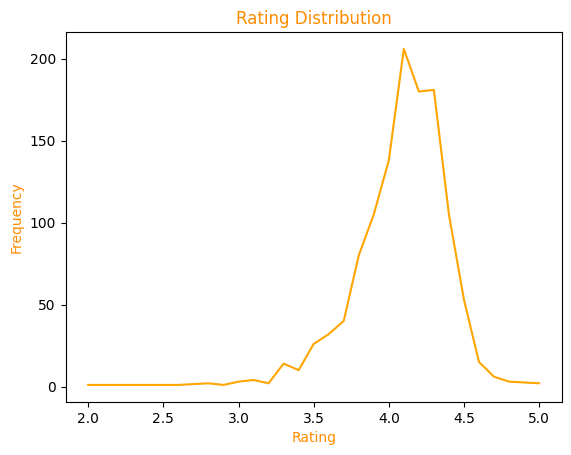

In [ ]:
#Plot a line chart to show how ratings distribute overal
plt.plot(rating_range, color = 'orange')
plt.title('Rating Distribution', color = 'darkorange')
plt.xlabel('Rating', color = 'darkorange')
plt.ylabel('Frequency', color = 'darkorange')
plt.show()

In [184]:
#Check discount range
amazon['discount_percentage'].value_counts().sort_index()

,count
discount_percentage,
0.0,45
2.0,2
3.0,3
4.0,4
5.0,4
...,...
88.0,4
89.0,1
90.0,5


> There are 45 out of 1256 products (~3.58%) not being applicable for discount promotion, they will be dropped for non-bias analysis and results.

In [185]:
updated_amazon = amazon[amazon['discount_percentage'] > 0]
updated_amazon  #1211 products

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,main_category,sub_category,product_type
8,B008IFXQFU,"TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...",Computers&Accessories|NetworkingDevices|Networ...,499.0,999.0,50.0,4.2,179691,USB WiFi Adapter —— Speedy wireless transmissi...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/TP-Link-TL-WN725N-150Mbp...,Computers&Accessories,NetworkingDevices|NetworkAdapters,WirelessUSBAdapters
16,B0B6F7LX4C,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,"Electronics|HomeTheater,TV&Video|Televisions|S...",13999.0,24999.0,44.0,4.2,32840,"Note : The brands, Mi and Xiaomi, are part of ...","AHEVOQADJSSRX7DS325HSFLMP7VQ,AG7XYZRCSKX6G2OLO...","Manoj maddheshiya,Manoj Kumar Sahoo,Saumil s.,...","R13UTIA6KOF6QV,R2UGDZSGFF01K7,RHHIZ45VYU5X6,R1...",It is the best tv if you are getting it in 10-...,Pros- xiomi 5a is best in budget-Nice picture ...,https://m.media-amazon.com/images/I/51fmHk3km+...,https://www.amazon.in/MI-inches-Ready-Android-...,Electronics,"HomeTheater,TV&Video|Televisions",SmartTelevisions
24,B0B1YVCJ2Y,Acer 80 cm (32 inches) I Series HD Ready Andro...,"Electronics|HomeTheater,TV&Video|Televisions|S...",11499.0,19990.0,42.0,4.3,4703,Resolution : HD Ready (1366x768) | Refresh Rat...,"AFSMISGEYDYIP3Z42UTQU4AKOYZQ,AF5ILQY4KFDTO5XHH...","Ayush,ROHIT A.,Kedar,Haran,Santosh Ghante,KRIS...","R1EBS3566VCSCG,R24MB66WRPSN2A,R25UU2M1B9BO5X,R...",Wonderful TV and Awful installation service fr...,About the TV - Wonderful----------------------...,https://m.media-amazon.com/images/I/41gikeSuhA...,https://www.amazon.in/Acer-inches-Ready-Androi...,Electronics,"HomeTheater,TV&Video|Televisions",SmartTelevisions
26,B08B42LWKN,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,"Electronics|HomeTheater,TV&Video|Televisions|S...",14999.0,19999.0,25.0,4.2,34899,Resolution: HD Ready (1366x768) | Refresh Rate...,"AFUT7ANZTZYGLXU65EQ2D5OP6UMA,AGT7YYJVUC6ZHRKQH...","ATHARVA BONDRE,Sujitkumar Thorat,Chandrasekara...","R3COVVOP2R7Z28,R2T6WHEO2ONNDD,RUFFV2QR43OCM,R2...","Worthy and most affordable - Great TV,Good pro...",This OnePlus TV is great if you want a afforda...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/OnePlus-inches-Ready-And...,Electronics,"HomeTheater,TV&Video|Televisions",SmartTelevisions
38,B0B3MMYHYW,OnePlus 126 cm (50 inches) Y Series 4K Ultra H...,"Electronics|HomeTheater,TV&Video|Televisions|S...",32999.0,45999.0,28.0,4.2,7298,Resolution: 4K Ultra HD (3840x2160) | Bezel-le...,"AGDOVGWZKEQ3M6DA2GHV6WUZT5SA,AGEUXHN7U2Q26CM6T...","Abhishek Kumar,Arun prasath,Naveen,Harmit,Plac...","R2J3Q3BUHJ2S7E,R2H2ELE1DG24VY,R1U1S7X7BPSZBU,R...","Decent product. Value for money.,Value for mon...",I am posting this after a few weeks of using t...,https://m.media-amazon.com/images/I/51hQfTroMz...,https://www.amazon.in/OnePlus-50-inches-Androi...,Electronics,"HomeTheater,TV&Video|Televisions",SmartTelevisions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,919.0,59.0,4.0,1090,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,Home&Kitchen,Kitchen&HomeAppliances

In [186]:
#Re-check discount range
discount_range = updated_amazon['discount_percentage'].value_counts().sort_index()
discount_range

,count
discount_percentage,
2.0,2
3.0,3
4.0,4
5.0,4
6.0,4
...,...
88.0,4
89.0,1
90.0,5


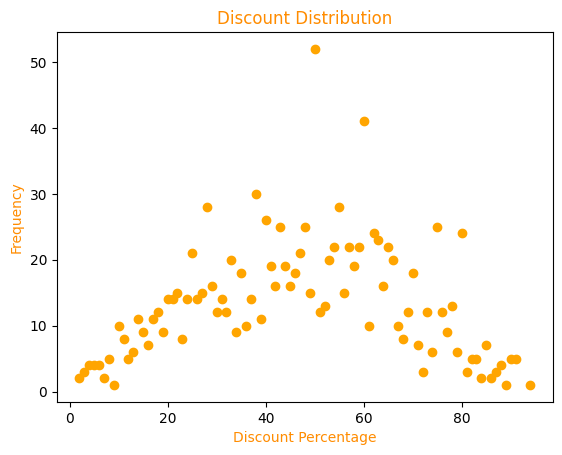

In [187]:
#Plot a scatter chart to show the frequency of discount levels
plt.scatter(discount_range.index, discount_range.values, color = 'orange')
plt.title('Discount Distribution', color = 'darkorange')
plt.xlabel('Discount Percentage', color = 'darkorange')
plt.ylabel('Frequency', color = 'darkorange')
plt.show()

> Set out different discount % ranges:
- Low discount %: < 25 %
- Medium discount %: >= 25% to < 50%
- High discount %: >= 50%

In [188]:
#Break down discount % into different ranges
low_discount = updated_amazon[updated_amazon['discount_percentage'] < 25]  #178 products
med_discount = updated_amazon[(updated_amazon['discount_percentage'] >= 25) & (updated_amazon['discount_percentage'] < 50)]  #444 products
high_discount = updated_amazon[updated_amazon['discount_percentage'] >= 50]  #589

In [189]:
#Rating distribution in low discount level
low_discount_rating_frequency = low_discount['rating'].value_counts().sort_index()
low_discount_rating_frequency

,count
rating,
3.3,1
3.4,1
3.5,2
3.6,3
3.7,3
3.8,7
3.9,14
4.0,22
4.1,34


In [190]:
#Rating distribution in med discount level
med_discount_rating_frequency = med_discount['rating'].value_counts().sort_index()
med_discount_rating_frequency

,count
rating,
2.0,1
2.6,1
3.1,1
3.2,1
3.3,2
3.4,3
3.5,7
3.6,11
3.7,9


In [191]:
#Rating distribution in high discount level
high_discount_rating_frequency = high_discount['rating'].value_counts().sort_index()
high_discount_rating_frequency

,count
rating,
2.3,1
2.8,2
2.9,1
3.0,3
3.1,3
3.2,1
3.3,11
3.4,6
3.5,17


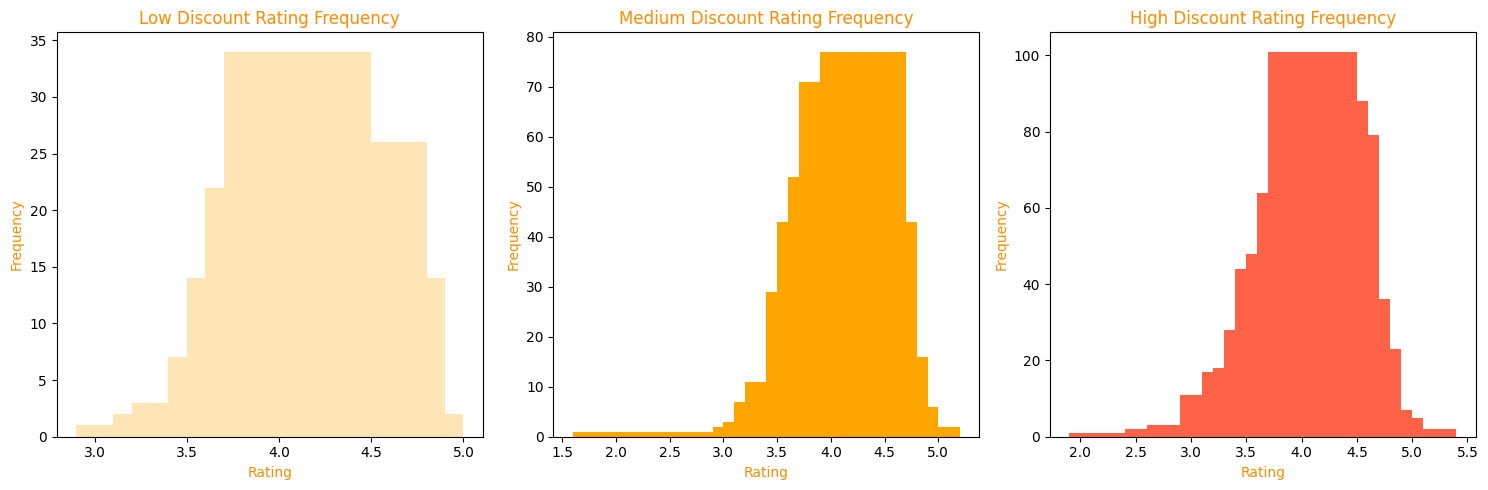

In [192]:
#Plot 3 bar charts side by side for low_discount_rating_frequency,  med_discount_rating_frequency and high_discount_rating_frequency for comparation

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#Low Discount Rating Frequency
axes[0].bar(low_discount_rating_frequency.index, low_discount_rating_frequency.values, color = 'moccasin')
axes[0].set_title('Low Discount Rating Frequency', color = 'darkorange')
axes[0].set_xlabel('Rating', color = 'darkorange')
axes[0].set_ylabel('Frequency', color = 'darkorange')

#Med Discount Rating Frequency
axes[1].bar(med_discount_rating_frequency.index, med_discount_rating_frequency.values, color = 'orange')
axes[1].set_title('Medium Discount Rating Frequency', color = 'darkorange')
axes[1].set_xlabel('Rating', color = 'darkorange')
axes[1].set_ylabel('Frequency', color = 'darkorange')

#High Discount Rating Frequency
axes[2].bar(high_discount_rating_frequency.index, high_discount_rating_frequency.values, color = 'tomato')
axes[2].set_title('High Discount Rating Frequency', color = 'darkorange')
axes[2].set_xlabel('Rating', color = 'darkorange')
axes[2].set_ylabel('Frequency', color = 'darkorange')

plt.tight_layout()
plt.show()


In [193]:
#Rating distribution in low discount level
low_discount['rating'].mean()

np.float64(4.152247191011236)

In [194]:
#Rating distribution in med discounted price range
med_discount['rating'].mean()

np.float64(4.103378378378379)

In [195]:
#Rating distribution in high discounted price range
high_discount['rating'].mean()

np.float64(4.046010186757216)



> Low Discount Level: rating ranging from 3.3 to 4.6, averagely at 4.15


> Med Discount Level: rating ranging from 2.0 to 4.8, averagely at 4.10


> High Discount Level: rating ranging from 2.3 to 5.0, averagely at 4.05



> **It shows there is a slightly decreasing tendency between discount levels and average ratings. To reinforce this finding, correlation calculate will be conducted.**









In [196]:
#Calculate correlation between discount levels and ratings to assess their relationship
correlation = updated_amazon['discount_percentage'].corr(updated_amazon['rating'])
print(f"Correlation coefficient: {correlation}")

Correlation coefficient: -0.14673277650122046


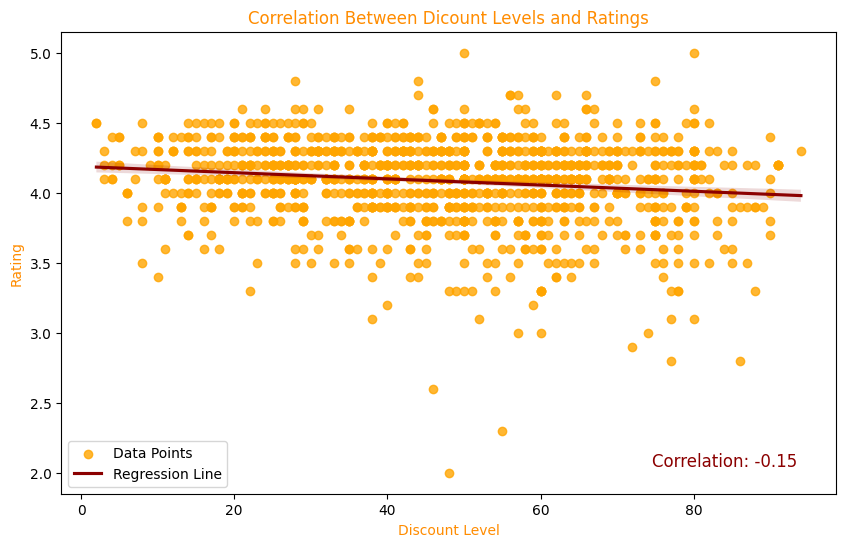

In [197]:
#PLot a scatter chart with regression line to show the correlation/trend of discount levels and ratings
plt.figure(figsize = (10,6))
sns.regplot( x = 'discount_percentage', y = 'rating', data = updated_amazon, scatter_kws = {'color':'orange'}, line_kws = {'color':'darkred'})
plt.title('Correlation Between Dicount Levels and Ratings', color = 'darkorange')
plt.xlabel('Discount Level', color = 'darkorange')
plt.ylabel('Rating', color = 'darkorange')
plt.legend(labels=['Data Points', 'Regression Line'], loc='lower left')
#Show the correlation figure on the chart
plt.text(0.95, 0.05, f"Correlation: {correlation:.2f}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='bottom', horizontalalignment='right', color='darkred')

plt.show()

R = -0.1467 suggests a weak negative linear relationship between discount percentages and ratings. This means that as the discount percentage slightly increases, the ratings tend to decrease, though the relationship is weak.


> This means Discounts are not a critical factor in determining customer satisfaction



# **2nd Aspect**: *Some products with bigger discounts still receive lower ratings - other factors*

In [198]:
#Check discounted price range
price_range = updated_amazon['discounted_price'].value_counts().sort_index()
price_range

,count
discounted_price,
39.00,1
57.89,1
59.00,1
67.00,1
69.00,1
...,...
46999.00,1
47990.00,2
54990.00,1


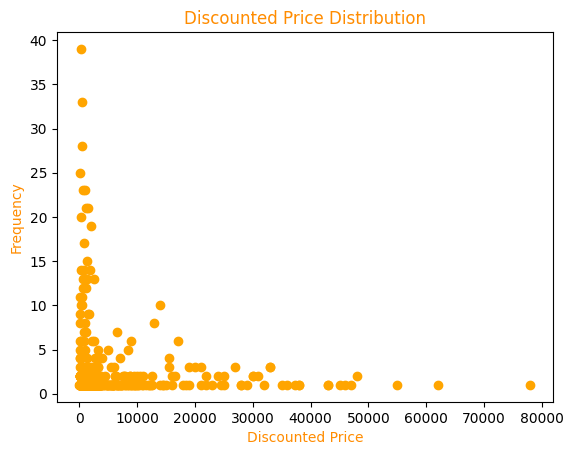

In [199]:
#Plot a scatter chart to show the frequency of discounted prices
plt.scatter(price_range.index, price_range.values, color = 'orange')
plt.title('Discounted Price Distribution', color = 'darkorange')
plt.xlabel('Discounted Price', color = 'darkorange')
plt.ylabel('Frequency', color = 'darkorange')
plt.show()

> Set out different discounted price ranges:
- Low discounted price: < ₹500
- Medium discounted price: >= ₹500 to <= ₹1000
- High discounted price: > ₹1000

In [200]:
#Break down discounted prices into different ranges
low_price = updated_amazon[updated_amazon['discounted_price'] < 500] #418 products
med_price = updated_amazon[(updated_amazon['discounted_price'] >= 500) & (updated_amazon['discounted_price'] <= 1000)] #218 products
high_price = updated_amazon[updated_amazon['discounted_price'] > 1000] #575 products

In [201]:
#Rating distribution in low discounted price range
low_price_rating_frequency = low_price['rating'].value_counts().sort_index()
low_price_rating_frequency

,count
rating,
2.6,1
2.8,2
2.9,1
3.0,1
3.1,2
3.2,1
3.3,6
3.4,5
3.5,13


In [202]:
#Rating distribution in med discounted price range
med_price_rating_frequency = med_price['rating'].value_counts().sort_index()
med_price_rating_frequency

,count
rating,
2.3,1
3.0,2
3.1,1
3.2,1
3.3,2
3.4,2
3.5,4
3.6,7
3.7,3


In [203]:
#Rating distribution in high discounted price range
high_price_rating_frequency = high_price['rating'].value_counts().sort_index()
high_price_rating_frequency

,count
rating,
2.0,1
3.1,1
3.3,6
3.4,3
3.5,9
3.6,11
3.7,15
3.8,48
3.9,52


In [204]:
#Rating distribution in low discounted price range
low_price['rating'].mean()

np.float64(4.058133971291866)

In [205]:
#Rating distribution in med discounted price range
med_price['rating'].mean()

np.float64(4.0926605504587155)

In [206]:
#Rating distribution in high discounted price range
high_price['rating'].mean()

np.float64(4.0966956521739135)

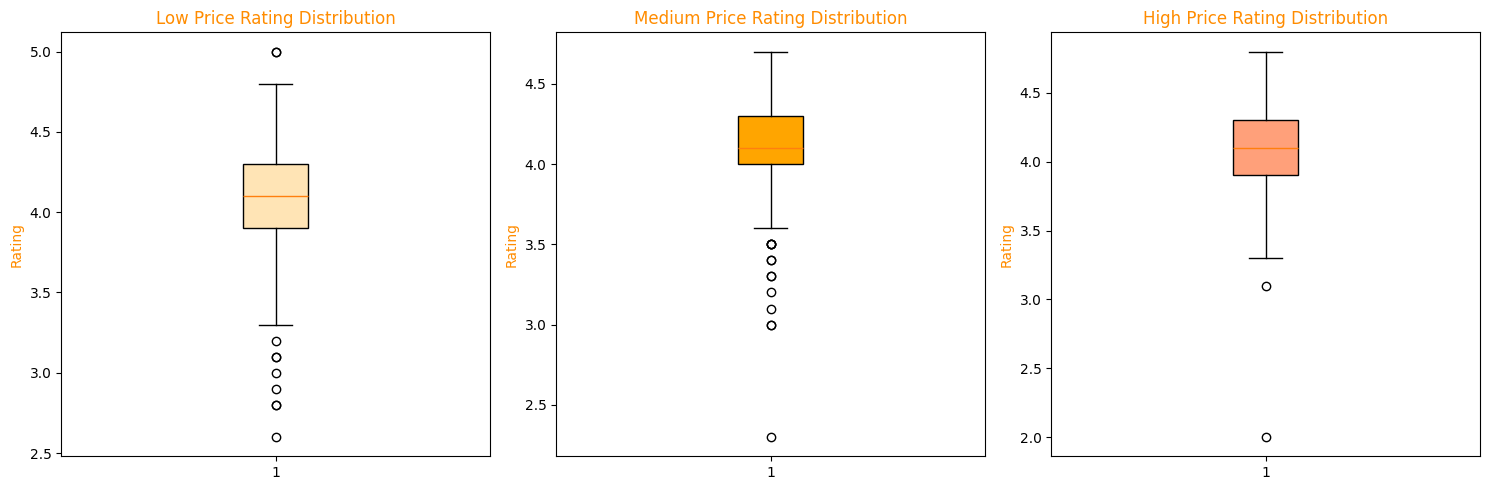

In [207]:
#Plot 3 boxplots side by side for low_price_rating_frequency, med_price_rating_frequency and high_price_rating_frequency for comparation

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#Low Price Rating Frequency
axes[0].boxplot(low_price['rating'], patch_artist=True, boxprops=dict(facecolor='moccasin'))
axes[0].set_title('Low Price Rating Distribution', color = 'darkorange')
axes[0].set_ylabel('Rating', color = 'darkorange')

#Med Price Rating Frequency
axes[1].boxplot(med_price['rating'], patch_artist=True, boxprops=dict(facecolor='orange'))
axes[1].set_title('Medium Price Rating Distribution', color = 'darkorange')
axes[1].set_ylabel('Rating', color = 'darkorange')

#High Price Rating Frequency
axes[2].boxplot(high_price['rating'], patch_artist=True, boxprops=dict(facecolor='lightsalmon'))
axes[2].set_title('High Price Rating Distribution', color = 'darkorange')
axes[2].set_ylabel('Rating', color = 'darkorange')

plt.tight_layout()
plt.show()




> Low Discounted Price Range: rating ranging from 2.6 to 5.0, averagely at 4.06


> Med Discounted Price Range: rating ranging from 2.3 to 4.7, averagely at 4.09


> High DDiscounted Price Range: rating ranging from 2.0 to 4.8, averagely at 4.10



> **It indicates that there is a upward trend between discounted price ranges and average ratings. However, higher discounted prices are also linked to lowest ratings. To examine this finding, correlation calculate will be conducted to further assess their relationship**









In [208]:
#Calculate correlation between discounted price and ratings to assess their relationship
correlation = updated_amazon['discounted_price'].corr(updated_amazon['rating'])
print(f"Correlation coefficient: {correlation}")

Correlation coefficient: 0.13419582216244885


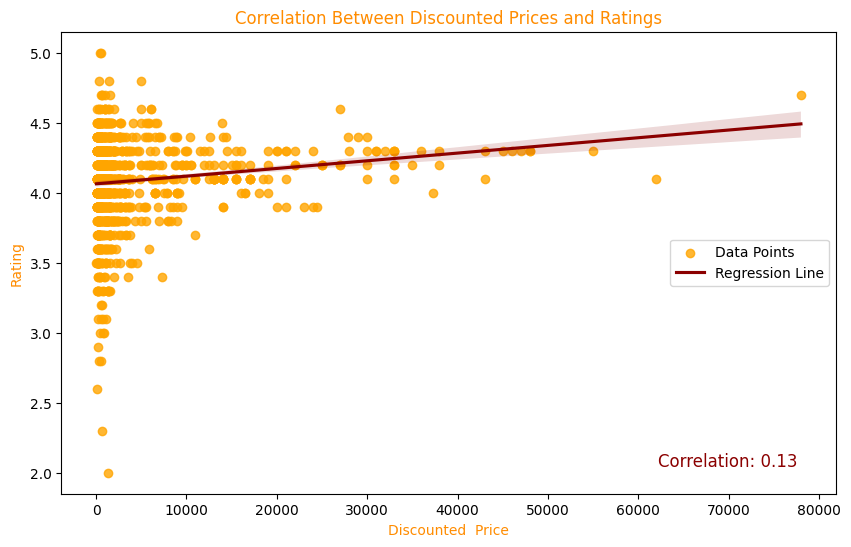

In [209]:
#PLot a scatter chart with regression line to show the correlation/trend of discount levels and ratings
plt.figure(figsize = (10,6))
sns.regplot( x = 'discounted_price', y = 'rating', data = updated_amazon, scatter_kws = {'color':'orange'}, line_kws = {'color':'darkred'})
plt.title('Correlation Between Discounted Prices and Ratings', color = 'darkorange')
plt.xlabel('Discounted  Price', color = 'darkorange')
plt.ylabel('Rating', color = 'darkorange')
plt.legend(labels=['Data Points', 'Regression Line'], loc='center right')
#Show the correlation figure on the chart
plt.text(0.95, 0.05, f"Correlation: {correlation:.2f}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='bottom', horizontalalignment='right', color='darkred')

plt.show()

The correlation coefficient of 0.1342 between discounted prices and ratings suggests a weak positive linear relationship, indicating that, although there is a slight tendency for higher ratings as discounted prices increase, the relationship is not strong enough to draw definitive conclusions.
> Customer satisfaction does not appear to be significantly impacted by discounted prices.

In [210]:
#Re-check products in high discount level
high_discount

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,main_category,sub_category,product_type
8,B008IFXQFU,"TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...",Computers&Accessories|NetworkingDevices|Networ...,499.0,999.0,50.0,4.2,179691,USB WiFi Adapter —— Speedy wireless transmissi...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/TP-Link-TL-WN725N-150Mbp...,Computers&Accessories,NetworkingDevices|NetworkAdapters,WirelessUSBAdapters
42,B07JW1Y6XV,Wayona Nylon Braided 3A Lightning to USB A Syn...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269,"[High Compatibility] : iPhone X/XsMax/Xr ,iPho...","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LB1-Sy...,Computers&Accessories,Accessories&Peripherals|Cables&Accessories|Cables,USBCables
44,B09NJN8L25,FLiX (Beetel USB to Micro USB PVC Data Sync & ...,Computers&Accessories|Accessories&Peripherals|...,59.0,199.0,70.0,4.0,9378,Micro USB charging cable for android phones an...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...",Worked on iPhone 7 and didn’t work on iPhone X...,https://m.media-amazon.com/images/I/31v7NnnAIt...,https://www.amazon.in/FLiX-Charging-480Mbps-De...,Computers&Accessories,Accessories&Peripherals|Cables&Accessories|Cables,USBCables
48,B09L8DSSFH,7SEVEN® Compatible for Samsung Smart 4K Ultra ...,"Electronics|HomeTheater,TV&Video|Accessories|R...",399.0,999.0,60.0,3.6,493,1. 7SEVEN Compatible remote suitable for all O...,"AH5G2FWQ6AJBXK2IDCA22BNQTT2A,AEEV73PQDYYMSQSW4...","MONTY,Qais Makani,Rajat Shuvra Roy,Amith PJ,Dh...","RVEWH0LAEO3NH,R3E42NTD6HXN1Q,R3IC0VLPIDBPTY,R1...","Overall Good,Works well. Will comment on durab...",Overall replacement of original samsung remote...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/7SEVENTM-Compatible-Repl...,Electronics,"HomeTheater,TV&Video|Accessories",RemoteControls
51,B0711PVX6Z,AmazonBasics Micro USB Fast Charging Cable for...,Computers&Accessories|Accessories&Peripherals|...,179.0,500.0,64.0,4.2,92595,Micro usb charging cable for android phones|Su...,"AF7IXQKBUL6NEIQG4R53LMJJUGXQ,AFODI4XXHXHBFFUHK...","Neeraj Vishwakarma,Siddharth,SD1908,Mukundha2g...","R22EUJ1B1AM0OU,R2K89RVGN8N9MO,R177X9L6ND6OA7,R...",Using it with my QC 3 Charger .So far- So good...,ABOUT AMAZONBASICS:xxxxxxxxxxxxxxxxxxxxxxxxxx...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/AmazonBasics-Micro-Charg...,Computers&Accessories,Accessories&Peripherals|Cables&Accessories|Cables,USBCables
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,B08ZXZ362Z,akiara - Makes life easy Mini Sewing Machine f...,Home&Kitchen|Kitchen&HomeAppliances|SewingMach...,1563.0,3098.0,50.0,3.5,2283,PORTABLE MINI SEWING MACHINE with threads and ...,"AEHOZYTOH5VUWA2Z7OB672WX4F5A,AEF3QNOCDEMLINRVM...","Vaishnavi,Paramesh,Kirti Gupta,Mousumi Ganguli...","R35122PFZXLW77,R20F9Z88XI969Z,R32BCA8W6W1KIF,R...","Okay,Use full only kid's clothes,Good for begi...",Overall I liked the productBut disappointed wi...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/akiara-Tailoring-Stitchi...,Home&

In [213]:
#Check how ratings distribution in high discount range
high_discount[['discount_percentage','rating']]

,discount_percentage,rating
8,50.0,4.2
42,64.0,4.2
44,70.0,4.0
48,60.0,3.6
51,64.0,4.2
...,...,...
1454,50.0,3.5
1456,59.0,3.2
1458,59.0,3.6
1459,80.0,3.1


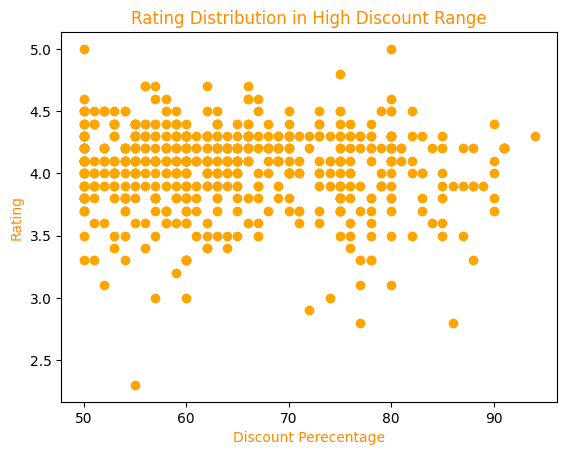

In [214]:
#Plot scatter chart for clearer view
plt.scatter('discount_percentage','rating', data = high_discount, color = 'orange')
plt.title('Rating Distribution in High Discount Range', color = 'darkorange')
plt.xlabel('Discount Perecentage', color = 'darkorange')
plt.ylabel('Rating', color = 'darkorange')
plt.show()

In [215]:
#Filter to products with high discounts (>= 50%) and low-medium ratings (< 3.5) since there are too little amount of high discount products in low rating (< 3)
high_discount_low_rating = high_discount[high_discount['rating'] < 3.5]  #183 products
high_discount_low_rating

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,main_category,sub_category,product_type
82,B08QX1CC14,SKYWALL 81.28 cm (32 inches) HD Ready Smart LE...,"Electronics|HomeTheater,TV&Video|Televisions|S...",7299.0,19125.0,62.0,3.4,902,Resolution: Full HD (1920 x 1080) | Refresh Ra...,"AFZBEV4BOWGRSEH2PK7D65ZW66PA,AFXQ3YGENWMRX36NX...","Naresh Patel,Bhaskar Reddy,Vipin Thakur,Ramdas...","R3MHRRK05RD01A,R14A3U8XTK1D7X,R1F10MFQBXZA8W,R...","Good in this price,Speakers and sound next lev...",Overall experience in this price is good.You c...,https://m.media-amazon.com/images/I/41M9BBMSUd...,https://www.amazon.in/Skywall-81-28-inches-Sma...,Electronics,"HomeTheater,TV&Video|Televisions",SmartTelevisions
179,B08XMSKKMM,7SEVEN® Bluetooth Voice Command Remote for Xia...,"Electronics|HomeTheater,TV&Video|Accessories|R...",799.0,1999.0,60.0,3.3,576,Compatible with MI Smart TV 4A 32 inch Led TV ...,"AHSDVZ3ZSHUMFGDLVVGATDIWKHTA,AEYTPTAYCRD42I77U...","ravi,Alex,Vineet M.,chakri,Siddhartha Bayye,Sa...","R19HSC60H637CV,RAJ9NOUFV1DOY,R3UVDDIPCFBZMK,R1...","Compatibility,Good one but voice not working p...",Thank you so much remote is compatible no abou...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/7SEVEN-Bluetooth-Command...,Electronics,"HomeTheater,TV&Video|Accessories",RemoteControls
236,B097ZQTDVZ,7SEVEN® TCL Remote Control Smart TV RC802V Rem...,"Electronics|HomeTheater,TV&Video|Accessories|R...",399.0,899.0,56.0,3.4,431,Compatible for TCL 65P8S 32A323 32A325 32P30S ...,"AGKXFGRXVN4CMGMCT5SGOPB6BBIQ,AGNKWLEKAA53Y27KT...","umakanth,Sagar Ranpise,Martin Gibson Karkada,R...","R16NWYD2LYHNFJ,R2Y32IVRENIANJ,R3BBJ9AXA1ZOSC,R...",When you can’t find the original this comes ha...,"Just got delivered, there’s lag in remote, it ...",https://m.media-amazon.com/images/I/31DRQ+kgWa...,https://www.amazon.in/RC802V-Compatible-43S650...,Electronics,"HomeTheater,TV&Video|Accessories",RemoteControls
263,B09F6D21BY,7SEVEN Compatible LG TV Remote Suitable for LG...,"Electronics|HomeTheater,TV&Video|Accessories|R...",790.0,1999.0,60.0,3.0,103,for LG TV series All Models of Remote Control ...,"AH7NTBDGAMGOFFADEVWJL3O4YQ2A,AEJUIUF6CYKRBWLSO...","Jarlina Nath,Sona,Ranjit Harchekar,Myneni Sune...","R1S2PH1JD9B9XB,R3UUKCS12Q0B9X,R16YH8SVJU5W61,R...","Not good,No voice recognition, No pointer ray ...",The mouse feature of the remote is not working...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Compatible-Suitable-Cont...,Electronics,"HomeTheater,TV&Video|Accessories",RemoteControls
275,B09LV13JFB,LOHAYA Voice Assistant Remote Compatible for A...,"Electronics|HomeTheater,TV&Video|Accessories|R...",399.0,999.0,60.0,3.3,23,100% Best Quality Plastic Body and Soft Silico...,"AERUC72DWRPOM2EHX3YBTBPKYV7A,AHMH6RNLYI2G65HY7...","Amazon Customer,Amazon Customer,Akul,Akash Yad...","R1P2VLNHZAHSCU,R28B2GC0X0RMKW,RQ2S0N0NGDQVY,R1...",When I placed the order I was in doubt whether...,"Ok,Very disappointedRange is not good it doesn...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/LOHAYA-Assistant-Compati...,Electronics,"HomeTheater,TV&Video|Accessories",RemoteControls
318,B09P8M18QM,7SEVEN® Compatible with Fire Tv Stick Remote w...,"Electronics|HomeTheater,TV&Video|Accessories|R...",1369.0,2999.0,54.0,3.3,227,[ Amazon Fire Tv Stick Remote ] New Replacemen...,"AG3J37R72LBQQ44KNHS3X3ZYQK5A,AF4DZ5N3WE57SPWX5...","Manikantan V,Murali Subramanian,Amazon Custome...","R2D1HX7B0ZNR2Y,RC6F71GCW3ITC,R2R5PXQ6I47FLE,R3...","Good, But Disappointed,Perfect replacement,Hav...","Volume Buttons, Mute & Power off options not w...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/7SEVENTM-Bluetooth-Comma...,Electronics,"HomeTheater,TV&Video|Accessories",RemoteControls
463,B0B53QFZPY,PTron Newly Launched Force X10 Bluetooth Calli...,Electronics|Wearab

In [216]:
#Take out only review title column
feedback = high_discount_low_rating['review_title']
feedback

,review_title
82,"Good in this price,Speakers and sound next lev..."
179,"Compatibility,Good one but voice not working p..."
236,When you can’t find the original this comes ha...
263,"Not good,No voice recognition, No pointer ray ..."
275,When I placed the order I was in doubt whether...
318,"Good, But Disappointed,Perfect replacement,Hav..."
463,just a watch not smart one... all features are...
492,just a watch not smart one... all features are...
506,just a watch not smart one... all features are...
545,"Very Good prodat,Battery life is 0 day,Good,Wh..."


In [217]:
#Convert feedback to lowercase
feedback = high_discount_low_rating['review_title'].str.lower()

#Split feedback by comma and remove strings containing potentially positive feedbacks
def process_feedback(feedback_series):
    all_strings = []
    for feedback_str in feedback_series:
        strings = [s.strip() for s in str(feedback_str).split(',') if s.strip()]
        for s in strings:
          if not ("good" in s or "ok" in s or "ভালো" in s or "amezing" in s or "nice" in s):
            all_strings.append(s)
    return all_strings

processed_feedback = process_feedback(feedback)


#Count each unique string
string_counts = pd.Series(processed_feedback).value_counts()

string_counts = string_counts.head(15)
string_counts

,count
just a watch not smart one... all features are to make fool of you,3
connecting problem with phone nd automatically disconnecting from phone.,3
damaged product supplied later on exchanged,3
worst watch,3
battery life less.,3
quality,2
not working properly,2
average product,2
don't buy,2
not as expected,2


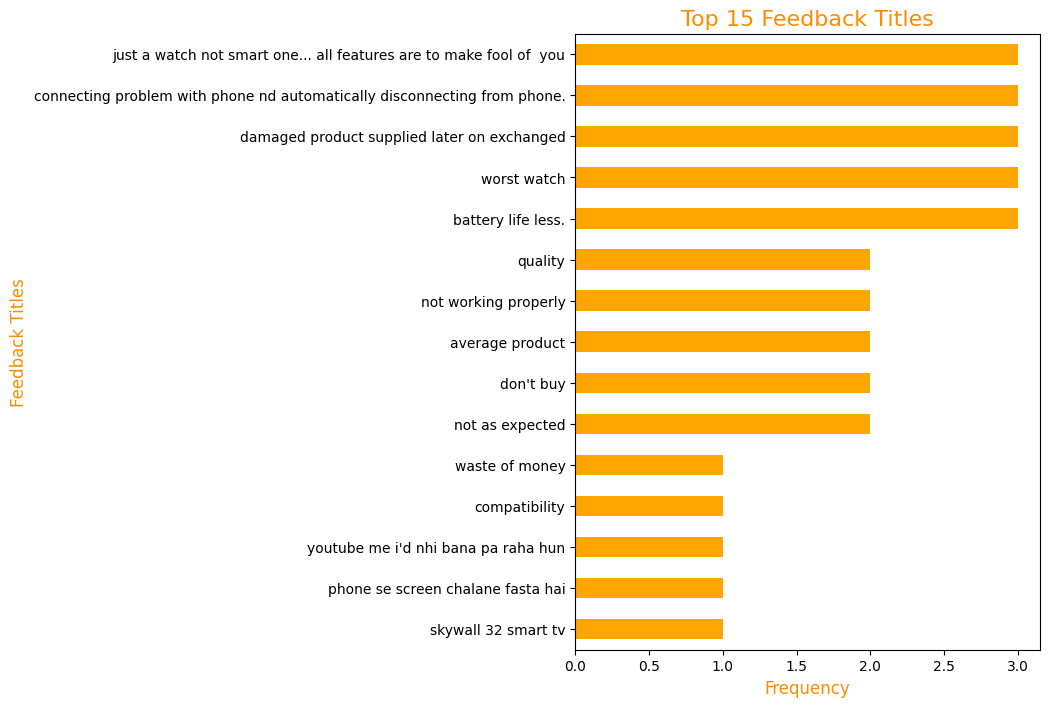

In [218]:
#Plot the barh chart to shown most review titles
plt.figure(figsize = (6, 8))
string_counts.plot(kind = 'barh', color = 'orange')
plt.title('Top 15 Feedback Titles', color = 'darkorange', fontsize=16)
plt.xlabel('Frequency', color = 'darkorange', fontsize=12)
plt.ylabel('Feedback Titles', color = 'darkorange', fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()




> Poor quality and malfunctioning products are likely primary determinants influencing customer satisfaction, such as disconnection and battery issue.



# **3rd Aspect**: *Optimize discount strategies for high-ticket items (expensive products) and ensure that customers are satisfied with their purchases*

In [219]:
#Check discounted price range
updated_amazon['discounted_price'].value_counts().sort_index()

,count
discounted_price,
39.00,1
57.89,1
59.00,1
67.00,1
69.00,1
...,...
46999.00,1
47990.00,2
54990.00,1


In [220]:
#Filter to high-ticket products (discounted price > $1,000 and in high discount range)
high_ticket_product = high_discount[high_discount['discounted_price'] > 1000]
high_ticket_product

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,main_category,sub_category,product_type
77,B09ZPM4C2C,TCL 80 cm (32 inches) HD Ready Certified Andro...,"Electronics|HomeTheater,TV&Video|Televisions|S...",10901.0,30990.0,65.0,4.1,398,Resolution: HD Ready (1366 x 768) | Refresh Ra...,"AFRONQAZPYZARLWLDQM2VXS7ZTIQ,AGA5INGXTDEODK7X5...","Nilesh K Salvi,Amazon Customer,Wippingstone T....","R95AYORS91NWX,R345JC4508EPTU,R20E3IUW7O236Z,R2...","Good, Value for Money,Picture quality was nice...","Everything is good. Just one suggestion, when ...",https://m.media-amazon.com/images/I/51ow6bmLWI...,https://www.amazon.in/TCL-inches-Certified-And...,Electronics,"HomeTheater,TV&Video|Televisions",SmartTelevisions
79,B0BCZCQTJX,Firestick Remote,"Electronics|HomeTheater,TV&Video|Accessories|R...",1434.0,3999.0,64.0,4.0,32,"Compatible For Amazon Fire TV Stick (3rd Gen, ...","AEC5PUIW4OSIDDQED7WLXG2S7TOQ,AGVXOHPJT64ZRYKHI...","Dharminder Singh Singha,Gnana Prasad Gopathi,a...","R35LMI5GBW0RX3,R35IGWMP7EV49V,R3KQ92E1PGHL45,R...","Good Product,Good product for my fire Tv,Over-...",Works well on my 4K Amazone fire TV stick as w...,https://m.media-amazon.com/images/I/31C4z2M8Ti...,https://www.amazon.in/Basesailor-2nd-generatio...,Electronics,"HomeTheater,TV&Video|Accessories",RemoteControls
82,B08QX1CC14,SKYWALL 81.28 cm (32 inches) HD Ready Smart LE...,"Electronics|HomeTheater,TV&Video|Televisions|S...",7299.0,19125.0,62.0,3.4,902,Resolution: Full HD (1920 x 1080) | Refresh Ra...,"AFZBEV4BOWGRSEH2PK7D65ZW66PA,AFXQ3YGENWMRX36NX...","Naresh Patel,Bhaskar Reddy,Vipin Thakur,Ramdas...","R3MHRRK05RD01A,R14A3U8XTK1D7X,R1F10MFQBXZA8W,R...","Good in this price,Speakers and sound next lev...",Overall experience in this price is good.You c...,https://m.media-amazon.com/images/I/41M9BBMSUd...,https://www.amazon.in/Skywall-81-28-inches-Sma...,Electronics,"HomeTheater,TV&Video|Televisions",SmartTelevisions
94,B09T3KB6JZ,TCL 100 cm (40 inches) Full HD Certified Andro...,"Electronics|HomeTheater,TV&Video|Televisions|S...",18990.0,40990.0,54.0,4.2,6659,Resolution: Full HD (1920 x 1080) | Refresh Ra...,"AGACKHUULXIV2SLNKKA6GWQOP7JQ,AHX6DQRYIJWTTXZ22...","KIRAN BABU BIREDDI,gaurav kumar,srinivasa redd...","R2GC03W48T3IJR,R3EL2OA6MMM893,R1GV21LOE1079G,R...","TV looks fine, however I see some lag while se...","TV looks fine, however I see some lag while se...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/TCL-inches-Certified-And...,Electronics,"HomeTheater,TV&Video|Televisions",SmartTelevisions
110,B09F6VHQXB,Croma 80 cm (32 Inches) HD Ready LED TV (CREL7...,"Electronics|HomeTheater,TV&Video|Televisions|S...",7390.0,20000.0,63.0,4.1,2581,Resolution: HD Ready (1366 x 768p) | Refresh R...,"AFCMYWUZMOK6KHPFLL4DTRV2KHWA,AEF55HUCR2L3DMBXV...","Ankit,Rishi Kapoor,Amazon Customer,Chandan Mah...","RTFGWAX83AVMH,R20TA215T3VGHG,R16SIFXH9BMQT2,RK...","Good.,Low price & value for money,Value for mo...","Middle class family ke liye kafi achha he, ame...",https://m.media-amazon.com/images/I/41fruBt99g...,https://www.amazon.in/Croma-Inches-Ready-CREL7...,Electronics,"HomeTheater,TV&Video|Televisions",StandardTelevisions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,B0BJ6P3LSK,Aqua d pure Active Copper 12-L RO+UV Water Fil...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,4999.0,24999.0,80.0,4.5,287,"Remove 95% to 98% TDS, 100% natural water, Ful...","AHXO56F7SD2DIP32TF2DYFXQRYLA,AF2JRVSNIBOLEQ7JJ...","Satya Ghettem,Amazon Customer,Selva naik,Aran,...","R3PB7I71NCM2LX,R3GDZTWTAD4D5O,R1VOJ065EWW8BS,R...","Good,Value for money,Good,Under 500 tds, it ge...",Product is good as of now. The major issues I ...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Aquadpure-Copper-RO-Auto...,Home&Kitchen,Kitchen&HomeAppliances|WaterPurifiers&Accessories,WaterFil

In [221]:
#Check rating level range of high ticket productd
high_ticket_product['rating'].value_counts().sort_index()

,count
rating,
3.3,4
3.4,2
3.5,3
3.6,4
3.7,7
3.8,20
3.9,16
4.0,15
4.1,31


> Since sales volume data is not available, rating_count will be treated as total sales

In [222]:
#Check sales range of high ticket products
high_ticket_product['rating_count'].value_counts().sort_index()

,count
rating_count,
4,1
7,1
19,1
32,1
37,1
...,...
107151,1
109864,1
136954,1


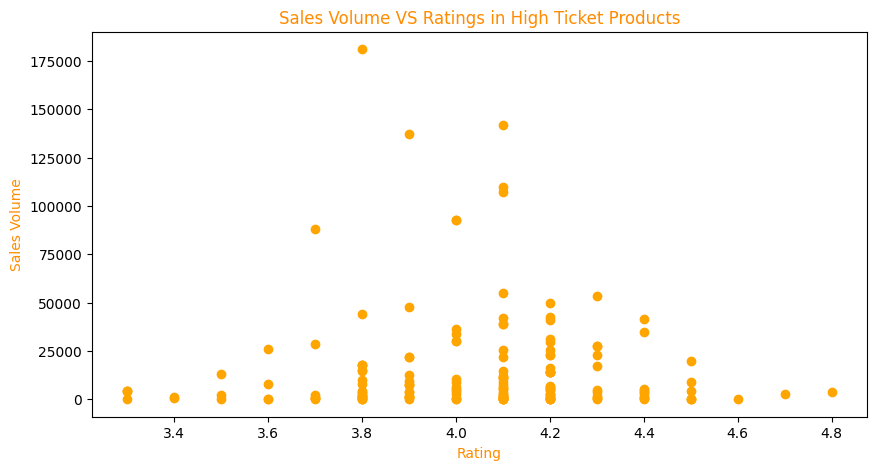

In [223]:
#Plot a scatter chart to see how ratings and sales volumns distributes in high ticket products
plt.figure(figsize = (10, 5))
plt.scatter('rating','rating_count', data = high_ticket_product, color = 'orange')
plt.title('Sales Volume VS Ratings in High Ticket Products', color = 'darkorange')
plt.xlabel('Rating', color = 'darkorange')
plt.ylabel('Sales Volume', color = 'darkorange')
plt.show()

In [224]:
#Fiter to high-ticket products with large volume of sales (> 10000)
high_sales = high_ticket_product[high_ticket_product['rating_count'] > 10000]
high_sales

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,main_category,sub_category,product_type
334,B0BF57RN3K,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Electronics|WearableTechnology|SmartWatches,1799.0,19999.0,91.0,4.2,13937,Fire-Boltt is India' No 1 Wearable Watch Brand...,"AEC6UDCEAUIBIFHGQDQ4KR67GC4A,AHRKSUOZXKKDERRY3...","venkatesh kg,Raghuram,YOGESH,Manan Parmar,Niku...","R1PKIMKR1E8X8T,R23UV7ZBIEEZD3,RYRHNVDKS5RFY,RS...","Worth the money,Good smart watch,the screen do...","I liked it, worth the money, light weight and ...",https://m.media-amazon.com/images/I/41WCgGbvwh...,https://www.amazon.in/Fire-Boltt-Bluetooth-Cal...,Electronics,WearableTechnology,SmartWatches
364,B0BF54972T,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Electronics|WearableTechnology|SmartWatches,1799.0,19999.0,91.0,4.2,13937,Fire-Boltt is India' No 1 Wearable Watch Brand...,"AEC6UDCEAUIBIFHGQDQ4KR67GC4A,AHRKSUOZXKKDERRY3...","venkatesh kg,Raghuram,YOGESH,Manan Parmar,Niku...","R1PKIMKR1E8X8T,R23UV7ZBIEEZD3,RYRHNVDKS5RFY,RS...","Worth the money,Good smart watch,the screen do...","I liked it, worth the money, light weight and ...",https://m.media-amazon.com/images/I/41mzbWC6Ak...,https://www.amazon.in/Fire-Boltt-Bluetooth-Cal...,Electronics,WearableTechnology,SmartWatches
368,B0BF563HB4,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Electronics|WearableTechnology|SmartWatches,1799.0,19999.0,91.0,4.2,13937,Fire-Boltt is India' No 1 Wearable Watch Brand...,"AEC6UDCEAUIBIFHGQDQ4KR67GC4A,AHRKSUOZXKKDERRY3...","venkatesh kg,Raghuram,YOGESH,Manan Parmar,Niku...","R1PKIMKR1E8X8T,R23UV7ZBIEEZD3,RYRHNVDKS5RFY,RS...","Worth the money,Good smart watch,the screen do...","I liked it, worth the money, light weight and ...",https://m.media-amazon.com/images/I/41ivjqdXb0...,https://www.amazon.in/Fire-Boltt-Bluetooth-Cal...,Electronics,WearableTechnology,SmartWatches
372,B0BF4YBLPX,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Electronics|WearableTechnology|SmartWatches,1799.0,19999.0,91.0,4.2,13937,Fire-Boltt is India' No 1 Wearable Watch Brand...,"AEC6UDCEAUIBIFHGQDQ4KR67GC4A,AHRKSUOZXKKDERRY3...","venkatesh kg,Raghuram,YOGESH,Manan Parmar,Niku...","R1PKIMKR1E8X8T,R23UV7ZBIEEZD3,RYRHNVDKS5RFY,RS...","Worth the money,Good smart watch,the screen do...","I liked it, worth the money, light weight and ...",https://m.media-amazon.com/images/I/410VGCE+q2...,https://www.amazon.in/Fire-Boltt-Bluetooth-Cal...,Electronics,WearableTechnology,SmartWatches
380,B0BF54LXW6,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Electronics|WearableTechnology|SmartWatches,1799.0,19999.0,91.0,4.2,13937,Fire-Boltt is India' No 1 Wearable Watch Brand...,"AEC6UDCEAUIBIFHGQDQ4KR67GC4A,AHRKSUOZXKKDERRY3...","venkatesh kg,Raghuram,YOGESH,Manan Parmar,Niku...","R1PKIMKR1E8X8T,R23UV7ZBIEEZD3,RYRHNVDKS5RFY,RS...","Worth the money,Good smart watch,the screen do...","I liked it, worth the money, light weight and ...",https://m.media-amazon.com/images/I/41Fq27ZjJf...,https://www.amazon.in/Fire-Boltt-Bluetooth-Cal...,Electronics,WearableTechnology,SmartWatches
385,B0B3RSDSZ3,Fire-Boltt Phoenix Smart Watch with Bluetooth ...,Electronics|WearableTechnology|SmartWatches,1999.0,9999.0,80.0,4.3,27696,Fire-Boltt is India' No 1 Wearable Watch Brand...,"AHUGCKS7YANTMDYINXQG2UDTU4JQ,AGHQ2VHXMPWZV5SV2...","yogita ratre,Arun k.,Amol Basutkar,janarthanan...","R34816YEM3Y2VJ,R3P1QZDIWJJYVR,R2HXC35HKL6S3E,R...","7-8/10, Decent, good for day to day use,Good c...","2 months review- its been working fine, there'...",https://m.media-amazon.com/images/I/41-CKEKnjy...,https://www.amazon.in/Fire-Boltt-Phoenix-Bluet...,Electronics,WearableTechnology,SmartWatches
390,B09PNKXSKF,Noise ColorFit Pulse Grand Smart Watch with 1....,Electronics|WearableTechnology|SmartWatches,1999.0,3990.0,50.0,4.0,30254,"1.69"" grand display: Get the rich immersive vi...","

In [225]:
#Filter to products with high rating level and high sales amount
top_products = high_ticket_product[(high_ticket_product['rating'].isin(high_rating['rating'])) & (high_ticket_product['rating_count'].isin(high_sales['rating_count']))]
top_products  #expensive > $1,000 & high sales & high rating

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,main_category,sub_category,product_type
334,B0BF57RN3K,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Electronics|WearableTechnology|SmartWatches,1799.0,19999.0,91.0,4.2,13937,Fire-Boltt is India' No 1 Wearable Watch Brand...,"AEC6UDCEAUIBIFHGQDQ4KR67GC4A,AHRKSUOZXKKDERRY3...","venkatesh kg,Raghuram,YOGESH,Manan Parmar,Niku...","R1PKIMKR1E8X8T,R23UV7ZBIEEZD3,RYRHNVDKS5RFY,RS...","Worth the money,Good smart watch,the screen do...","I liked it, worth the money, light weight and ...",https://m.media-amazon.com/images/I/41WCgGbvwh...,https://www.amazon.in/Fire-Boltt-Bluetooth-Cal...,Electronics,WearableTechnology,SmartWatches
364,B0BF54972T,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Electronics|WearableTechnology|SmartWatches,1799.0,19999.0,91.0,4.2,13937,Fire-Boltt is India' No 1 Wearable Watch Brand...,"AEC6UDCEAUIBIFHGQDQ4KR67GC4A,AHRKSUOZXKKDERRY3...","venkatesh kg,Raghuram,YOGESH,Manan Parmar,Niku...","R1PKIMKR1E8X8T,R23UV7ZBIEEZD3,RYRHNVDKS5RFY,RS...","Worth the money,Good smart watch,the screen do...","I liked it, worth the money, light weight and ...",https://m.media-amazon.com/images/I/41mzbWC6Ak...,https://www.amazon.in/Fire-Boltt-Bluetooth-Cal...,Electronics,WearableTechnology,SmartWatches
368,B0BF563HB4,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Electronics|WearableTechnology|SmartWatches,1799.0,19999.0,91.0,4.2,13937,Fire-Boltt is India' No 1 Wearable Watch Brand...,"AEC6UDCEAUIBIFHGQDQ4KR67GC4A,AHRKSUOZXKKDERRY3...","venkatesh kg,Raghuram,YOGESH,Manan Parmar,Niku...","R1PKIMKR1E8X8T,R23UV7ZBIEEZD3,RYRHNVDKS5RFY,RS...","Worth the money,Good smart watch,the screen do...","I liked it, worth the money, light weight and ...",https://m.media-amazon.com/images/I/41ivjqdXb0...,https://www.amazon.in/Fire-Boltt-Bluetooth-Cal...,Electronics,WearableTechnology,SmartWatches
372,B0BF4YBLPX,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Electronics|WearableTechnology|SmartWatches,1799.0,19999.0,91.0,4.2,13937,Fire-Boltt is India' No 1 Wearable Watch Brand...,"AEC6UDCEAUIBIFHGQDQ4KR67GC4A,AHRKSUOZXKKDERRY3...","venkatesh kg,Raghuram,YOGESH,Manan Parmar,Niku...","R1PKIMKR1E8X8T,R23UV7ZBIEEZD3,RYRHNVDKS5RFY,RS...","Worth the money,Good smart watch,the screen do...","I liked it, worth the money, light weight and ...",https://m.media-amazon.com/images/I/410VGCE+q2...,https://www.amazon.in/Fire-Boltt-Bluetooth-Cal...,Electronics,WearableTechnology,SmartWatches
380,B0BF54LXW6,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Electronics|WearableTechnology|SmartWatches,1799.0,19999.0,91.0,4.2,13937,Fire-Boltt is India' No 1 Wearable Watch Brand...,"AEC6UDCEAUIBIFHGQDQ4KR67GC4A,AHRKSUOZXKKDERRY3...","venkatesh kg,Raghuram,YOGESH,Manan Parmar,Niku...","R1PKIMKR1E8X8T,R23UV7ZBIEEZD3,RYRHNVDKS5RFY,RS...","Worth the money,Good smart watch,the screen do...","I liked it, worth the money, light weight and ...",https://m.media-amazon.com/images/I/41Fq27ZjJf...,https://www.amazon.in/Fire-Boltt-Bluetooth-Cal...,Electronics,WearableTechnology,SmartWatches
385,B0B3RSDSZ3,Fire-Boltt Phoenix Smart Watch with Bluetooth ...,Electronics|WearableTechnology|SmartWatches,1999.0,9999.0,80.0,4.3,27696,Fire-Boltt is India' No 1 Wearable Watch Brand...,"AHUGCKS7YANTMDYINXQG2UDTU4JQ,AGHQ2VHXMPWZV5SV2...","yogita ratre,Arun k.,Amol Basutkar,janarthanan...","R34816YEM3Y2VJ,R3P1QZDIWJJYVR,R2HXC35HKL6S3E,R...","7-8/10, Decent, good for day to day use,Good c...","2 months review- its been working fine, there'...",https://m.media-amazon.com/images/I/41-CKEKnjy...,https://www.amazon.in/Fire-Boltt-Phoenix-Bluet...,Electronics,WearableTechnology,SmartWatches
484,B09YV3K34W,Fire-Boltt India's No 1 Smartwatch Brand Talk ...,Electronics|WearableTechnology|SmartWatches,2199.0,9999.0,78.0,4.2,29472,【Bluetooth Calling Watch】- Fire-Boltt Talk 2 s...,"AEJ

In [226]:
#Take out only reviews title of top products for analysis
top_review = top_products['review_title'].str.lower()
top_review

,review_title
334,"worth the money,good smart watch,the screen do..."
364,"worth the money,good smart watch,the screen do..."
368,"worth the money,good smart watch,the screen do..."
372,"worth the money,good smart watch,the screen do..."
380,"worth the money,good smart watch,the screen do..."
385,"7-8/10, decent, good for day to day use,good c..."
484,"worth the price, expecting good performance on..."
508,"7-8/10, decent, good for day to day use,good c..."
517,"premium looking watch,excellent product,the tr..."
535,"budget friendly watch,good product at this pri..."


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('good', 36), ('product', 25), ('watch', 21), ('smart', 12), ('budget', 12), ('quality', 12), ('price', 11), ('screen', 8), ('friendly', 8), ('worth', 7), ('moneygood', 7), ('day', 6), ('watchthe', 5), ('turn', 5), ('double', 5), ('tap', 5), ('press', 5), ('buttonuser', 5), ('uibest', 5), ('allrounder', 5)]


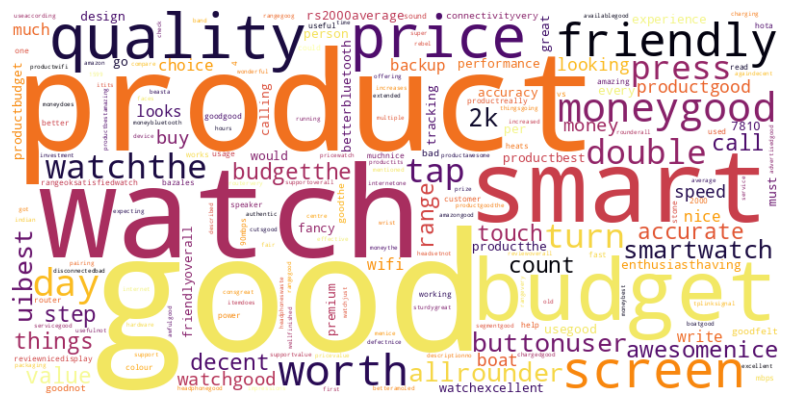

In [227]:
#Plot a wordcloud to showcase the most common feedbacks
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

#Download NLTK stopwords
import nltk
nltk.download('stopwords')

#Concatenate all feedbacks into a single string
all_feedback = " ".join(top_review)

#Preprocess the text: Remove punctuation, special characters, and convert to lowercase
all_feedback = re.sub(r'[^\w\s]', '', all_feedback.lower())

#Tokenize the text into words
words = all_feedback.split()

#Remove stopwords (common words that don't contribute to meaning, e.g., 'the', 'is', 'in')
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

# Count the frequency of each word
word_counts = Counter(filtered_words)

# Get the most common words
common_words = word_counts.most_common(20)  #Show top 20 words

# Print the most common words
print(common_words)

#Generate a word cloud for visualization
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap = 'inferno').generate_from_frequencies(word_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()




> Reasonable price and reliable product quality are significantly contributed to massive sales and high ratings for high-ticket products. These aspects should be sustainably committed tp maximise sales and increase good ratings.



In [228]:
#Fiter to high-ticket products with low volume of sales (< 2000)
low_sales = high_ticket_product[high_ticket_product['rating_count'] < 2000]
low_sales

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,main_category,sub_category,product_type
77,B09ZPM4C2C,TCL 80 cm (32 inches) HD Ready Certified Andro...,"Electronics|HomeTheater,TV&Video|Televisions|S...",10901.0,30990.0,65.0,4.1,398,Resolution: HD Ready (1366 x 768) | Refresh Ra...,"AFRONQAZPYZARLWLDQM2VXS7ZTIQ,AGA5INGXTDEODK7X5...","Nilesh K Salvi,Amazon Customer,Wippingstone T....","R95AYORS91NWX,R345JC4508EPTU,R20E3IUW7O236Z,R2...","Good, Value for Money,Picture quality was nice...","Everything is good. Just one suggestion, when ...",https://m.media-amazon.com/images/I/51ow6bmLWI...,https://www.amazon.in/TCL-inches-Certified-And...,Electronics,"HomeTheater,TV&Video|Televisions",SmartTelevisions
79,B0BCZCQTJX,Firestick Remote,"Electronics|HomeTheater,TV&Video|Accessories|R...",1434.0,3999.0,64.0,4.0,32,"Compatible For Amazon Fire TV Stick (3rd Gen, ...","AEC5PUIW4OSIDDQED7WLXG2S7TOQ,AGVXOHPJT64ZRYKHI...","Dharminder Singh Singha,Gnana Prasad Gopathi,a...","R35LMI5GBW0RX3,R35IGWMP7EV49V,R3KQ92E1PGHL45,R...","Good Product,Good product for my fire Tv,Over-...",Works well on my 4K Amazone fire TV stick as w...,https://m.media-amazon.com/images/I/31C4z2M8Ti...,https://www.amazon.in/Basesailor-2nd-generatio...,Electronics,"HomeTheater,TV&Video|Accessories",RemoteControls
82,B08QX1CC14,SKYWALL 81.28 cm (32 inches) HD Ready Smart LE...,"Electronics|HomeTheater,TV&Video|Televisions|S...",7299.0,19125.0,62.0,3.4,902,Resolution: Full HD (1920 x 1080) | Refresh Ra...,"AFZBEV4BOWGRSEH2PK7D65ZW66PA,AFXQ3YGENWMRX36NX...","Naresh Patel,Bhaskar Reddy,Vipin Thakur,Ramdas...","R3MHRRK05RD01A,R14A3U8XTK1D7X,R1F10MFQBXZA8W,R...","Good in this price,Speakers and sound next lev...",Overall experience in this price is good.You c...,https://m.media-amazon.com/images/I/41M9BBMSUd...,https://www.amazon.in/Skywall-81-28-inches-Sma...,Electronics,"HomeTheater,TV&Video|Televisions",SmartTelevisions
121,B0BHZCNC4P,Remote Control Compatible for Amazon Fire Tv S...,"Electronics|HomeTheater,TV&Video|Accessories|R...",1499.0,3999.0,63.0,3.7,37,"Compatible with Fire TV Stick Lite, Compatible...","AHY3QEA3CVS57POB64VVMQSPHHHA,AG633F2HW3BKLPJU3...","Abhishek Shode,Mahendra,Vishal M,Amazon Custom...","R2RC9IQ0X5NHFU,ROE0YIUOFNATH,R1UUDX7FZOB74Y,R3...",Some buttons not working in first week of purc...,Some buttons not working in first week of purc...,https://m.media-amazon.com/images/I/31-J+oOnb8...,https://www.amazon.in/Remote-Control-Compatibl...,Electronics,"HomeTheater,TV&Video|Accessories",RemoteControls
123,B099K9ZX65,Hisense 108 cm (43 inches) 4K Ultra HD Smart C...,"Electronics|HomeTheater,TV&Video|Televisions|S...",20990.0,44990.0,53.0,4.1,1259,Resolution: 4K Ultra HD (3840x2160) | Refresh ...,"AFP334GQV3WBH6XJIX5VITMYOH2A,AHAIKXSSOQ7R5GBPV...","Ravi Naresh,anup,Chinmay Bapusaheb Gayake,Heta...","R1Z33CAT0B5EQM,R38KPAP35GXYOK,R26YGSNK20I13P,R...","Hisense Vivid 4K TV Initial Impressions,Pictur...","Hi all, firstly, I was very skeptical to purch...",https://m.media-amazon.com/images/I/51Pu9zNUbt...,https://www.amazon.in/Hisense-inches-Certified...,Electronics,"HomeTheater,TV&Video|Televisions",SmartTelevisions
127,B09X1M3DHX,iFFALCON 80 cm (32 inches) HD Ready Smart LED ...,"Electronics|HomeTheater,TV&Video|Televisions|S...",9999.0,27990.0,64.0,4.2,1269,Resolution: HD Ready (1366 x 768) | Refresh Ra...,"AF3IXM2LI57OSMIOBF55GYWRIYKA,AHDY3KBEOCPCYVEOY...","giribabu,Dhuna Charan Dalai.,RCLJ,Arun Gowda,p...","R148TZG032T23O,R3NNEPKX2Y3RFA,R28AX5SR6R1EGR,R...","IFalcon 32inch smart TV,It's good,Good in Smar...",Apart from dispatch of the item by Amazon the ...,https://m.media-amazon.com/images/I/51O93lUTxt...,https://www.amazon.in/iFFALCON-inches-Ready-Sm...,Electronics,"HomeTheater,TV&Video|Televisions",SmartTelevisions
150,B0BB3CBFBM,VU 138 cm (55 inches) Premium Series 4K Ultra ...,"Electronics|HomeTheater,TV&Vid

In [229]:
low_performing_products = high_ticket_product[((high_ticket_product['rating'] < 3.5) & (high_ticket_product['rating_count'] < 2000))]
low_performing_products

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,main_category,sub_category,product_type
82,B08QX1CC14,SKYWALL 81.28 cm (32 inches) HD Ready Smart LE...,"Electronics|HomeTheater,TV&Video|Televisions|S...",7299.0,19125.0,62.0,3.4,902,Resolution: Full HD (1920 x 1080) | Refresh Ra...,"AFZBEV4BOWGRSEH2PK7D65ZW66PA,AFXQ3YGENWMRX36NX...","Naresh Patel,Bhaskar Reddy,Vipin Thakur,Ramdas...","R3MHRRK05RD01A,R14A3U8XTK1D7X,R1F10MFQBXZA8W,R...","Good in this price,Speakers and sound next lev...",Overall experience in this price is good.You c...,https://m.media-amazon.com/images/I/41M9BBMSUd...,https://www.amazon.in/Skywall-81-28-inches-Sma...,Electronics,"HomeTheater,TV&Video|Televisions",SmartTelevisions
318,B09P8M18QM,7SEVEN® Compatible with Fire Tv Stick Remote w...,"Electronics|HomeTheater,TV&Video|Accessories|R...",1369.0,2999.0,54.0,3.3,227,[ Amazon Fire Tv Stick Remote ] New Replacemen...,"AG3J37R72LBQQ44KNHS3X3ZYQK5A,AF4DZ5N3WE57SPWX5...","Manikantan V,Murali Subramanian,Amazon Custome...","R2D1HX7B0ZNR2Y,RC6F71GCW3ITC,R2R5PXQ6I47FLE,R3...","Good, But Disappointed,Perfect replacement,Hav...","Volume Buttons, Mute & Power off options not w...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/7SEVENTM-Bluetooth-Comma...,Electronics,"HomeTheater,TV&Video|Accessories",RemoteControls
1346,B09Y358DZQ,Pigeon Zest Mixer Grinder 3 Speed Control 750 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2033.0,4295.0,53.0,3.4,422,[ Powerful & Efficient Motor ] : This Pigeon M...,"AEP43IVDSJR5UREBLL53W5AJKZTQ,AEJS5VAOH7KD6X2F3...","Srishti Agraharrie,Priya,Amazon Customer,Hones...","R1HFQQWKU1B7T9,R3HPSXLWX2RSHO,R2ZFEFLH2H6BOJ,R...","Not as expected,DON'T BUY pegion products, NO ...",Has only one blade in jar and the jar quality ...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Pigeon-Powerful-Stainles...,Home&Kitchen,Kitchen&HomeAppliances|SmallKitchenAppliances,MixerGrinders


In [230]:
low_review = low_performing_products['review_title'].str.lower()
low_review

,review_title
82,"good in this price,speakers and sound next lev..."
318,"good, but disappointed,perfect replacement,hav..."
1346,"not as expected,don't buy pegion products, no ..."


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('pricespeakers', 1), ('sound', 1), ('next', 1), ('levelbad', 1), ('remoteremote', 1), ('quality', 1), ('skywall', 1), ('32', 1), ('smart', 1), ('tvphone', 1), ('se', 1), ('screen', 1), ('chalane', 1), ('fasta', 1), ('haiyoutube', 1), ('id', 1), ('nhi', 1), ('bana', 1), ('pa', 1), ('raha', 1)]


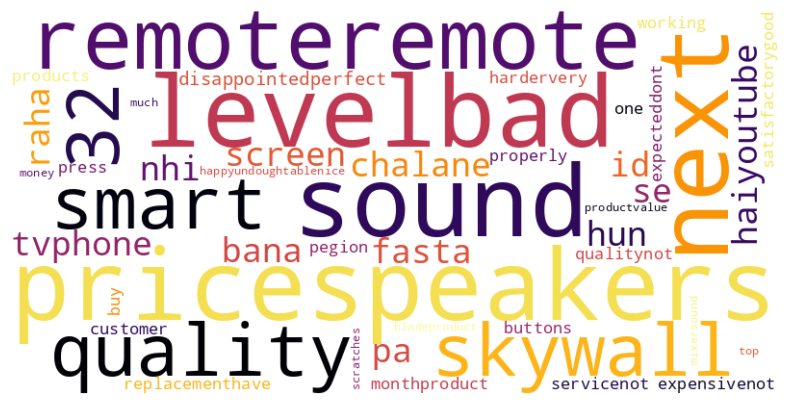

In [231]:
#Plot a wordcloud to showcase the most common feedbacks
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

#Download NLTK stopwords
import nltk
nltk.download('stopwords')

#Concatenate all feedbacks into a single string
all_feedback = " ".join(low_review)

#Preprocess the text: Remove punctuation, special characters, and convert to lowercase
all_feedback = re.sub(r'[^\w\s]', '', all_feedback.lower())

#Tokenize the text into words
words = all_feedback.split()

#Remove stopwords (common words that don't contribute to meaning, e.g., 'the', 'is', 'in')
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

# Count the frequency of each word
word_counts = Counter(filtered_words)

# Remove 'good' and 'problemgood' from word_counts
for word in list(word_counts): # Iterate over a copy of the keys
    if word == 'good' or word == 'problemgood':
        del word_counts[word]

# Get the most common words
common_words = word_counts.most_common(20)  #Show top 20 words

# Print the most common words
print(common_words)

#Generate a word cloud for visualization
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap = 'inferno').generate_from_frequencies(word_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



> Again, feedbacks data suggests that product quality and after-discount prices play a crucial role in determining customer satisfaction. Increased prioritization of these aspects improvement shall essentially contribute to improved customer satisfaction while accelerating revenue during discount promotion.



# **4th Aspect**: *Insights into which product categories benefit the most from discounts*



> Break down products into different categories => Categories have been split into main categories and Sub categories.



In [232]:
#Total products in each main categories
total_product = updated_amazon['main_category'].value_counts().sort_values(ascending = False)
total_product

,count
main_category,
Electronics,444
Home&Kitchen,430
Computers&Accessories,313
OfficeProducts,18
MusicalInstruments,2
HomeImprovement,2
Car&Motorbike,1
Health&PersonalCare,1


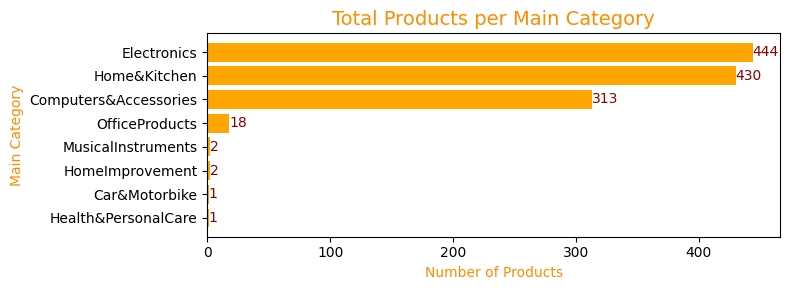

In [233]:
#Plot a rotated bar chart for total_product
plt.figure(figsize=(8, 3))
bars = plt.barh(total_product.index, total_product.values, color='orange')
plt.title('Total Products per Main Category', color='darkorange', fontsize=14)
plt.xlabel('Number of Products', color='darkorange')
plt.ylabel('Main Category', color='darkorange')
plt.gca().invert_yaxis()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add the count values on top of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{int(width)}',
             ha='left', va='center', color='darkred', fontsize=10)

plt.tight_layout()
plt.show()


In [234]:
#Average discount % in each main category
average_discount_by_category = updated_amazon.groupby('main_category')['discount_percentage'].mean().round(2)
average_discount_by_category.sort_values()

,discount_percentage
main_category,
OfficeProducts,21.28
Home&Kitchen,41.76
Car&Motorbike,42.00
MusicalInstruments,46.00
Electronics,49.94
Computers&Accessories,52.89
Health&PersonalCare,53.00
HomeImprovement,57.50


In [235]:
#Average rating level in each category
average_rating_by_category = updated_amazon.groupby('main_category')['rating'].mean().round(2)
average_rating_by_category.sort_values()

,rating
main_category,
Car&Motorbike,3.80
MusicalInstruments,3.90
Health&PersonalCare,4.00
Home&Kitchen,4.03
Electronics,4.07
Computers&Accessories,4.16
HomeImprovement,4.25
OfficeProducts,4.31


Discount % ranges:
- Low discount %: < 25 %
- Medium discount %: >= 25% to < 50%
- High discount %: >= 50%

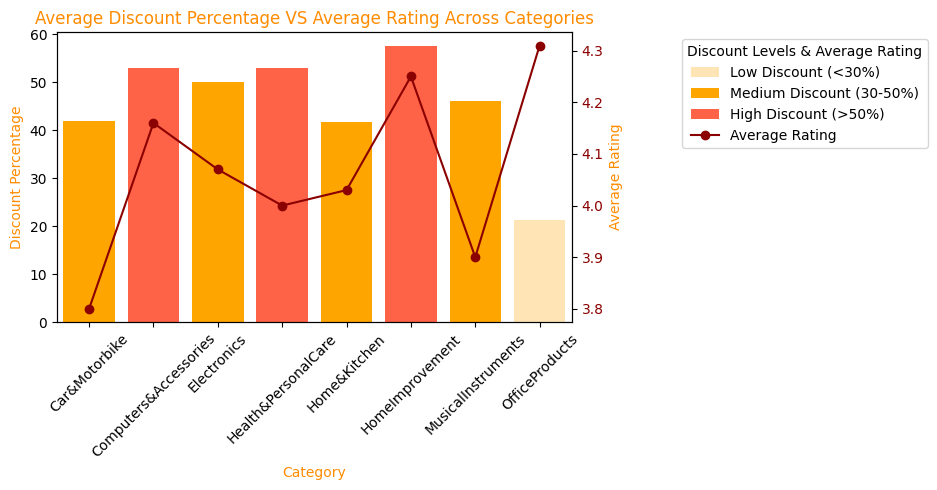

In [236]:
#Plot a bar chart to show average discount percentage across all main categories with different colors presenting high, medium and low discount %
from matplotlib.lines import Line2D  # Import Line2D from matplotlib.lines
from matplotlib.patches import Patch #Import Patch from matplotlib.patches

average_discount_by_category.plot(kind = 'bar', figsize = (10,5))

# Iterate through the categories and set colors based on discount percentage
for i, (category, discount) in enumerate(average_discount_by_category.items()):
    color = 'moccasin'  # Default color
    if discount >= 50:
        color = 'tomato'
    elif 25 <= discount < 50:
        color = 'orange'
    plt.bar(i, discount, color=color)

plt.title('Average Discount Percentage VS Average Rating Across Categories', color = 'darkorange')
plt.xlabel('Category', color = 'darkorange')
plt.ylabel('Discount Percentage', color = 'darkorange')
plt.xticks(rotation = 45)

# Create a second y-axis for the average rating
ax2 = plt.gca().twinx()

# Plot the average rating as a line chart
average_rating_line = ax2.plot(average_rating_by_category.index, average_rating_by_category.values, color='darkred', marker='o', linestyle='-')

# Set labels and title for the second y-axis
ax2.set_ylabel('Average Rating', color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkred')

# Create legend elements
legend_elements = [
    Patch(facecolor='moccasin', label='Low Discount (<30%)'),
    Patch(facecolor='orange', label='Medium Discount (30-50%)'),
    Patch(facecolor='tomato', label='High Discount (>50%)'),
    Line2D([0], [0], color='darkred', marker='o', linestyle='-', label='Average Rating')]

# Add the legend to the plot with adjusted location
plt.legend(handles=legend_elements, title="Discount Levels & Average Rating", bbox_to_anchor=(1.2, 1), loc='upper left')  #bbox_to_anchor=(1.05, 1): places the legend outside of the chart
plt.tight_layout() # This helps to prevent overlapping elements

plt.show()


In [237]:
#Total sales of each category with high discount products
high_discount_category_total_sales = high_discount.groupby('main_category')['rating_count'].sum().sort_values(ascending = False)
high_discount_category_total_sales

,rating_count
main_category,
Electronics,5912414
Computers&Accessories,3127593
Home&Kitchen,651098
MusicalInstruments,68664
OfficeProducts,12874
HomeImprovement,8566
Health&PersonalCare,3663


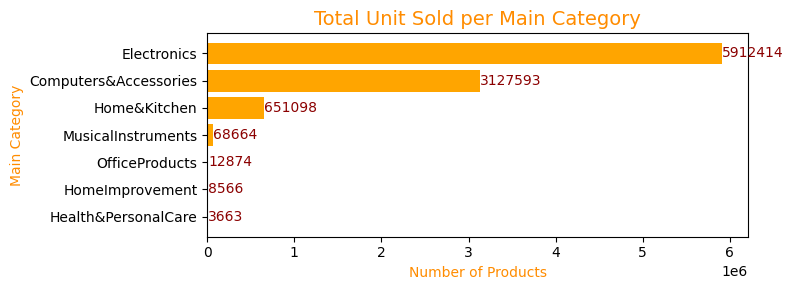

In [238]:
#Plot a rotated bar chart for total_product
plt.figure(figsize=(8, 3))
bars = plt.barh(high_discount_sales.index, high_discount_sales.values, color='orange')
plt.title('Total Unit Sold per Main Category', color='darkorange', fontsize=14)
plt.xlabel('Number of Products', color='darkorange')
plt.ylabel('Main Category', color='darkorange')
plt.gca().invert_yaxis()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add the count values on top of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{int(width)}',
             ha='left', va='center', color='darkred', fontsize=10)

plt.tight_layout()
plt.show()


In [239]:
#The most sales categories in high discount range
most_sales_categories = high_discount_sales[high_discount_sales > 100000]
most_sales_categories.sort_index()

,rating_count
main_category,
Computers&Accessories,3127593
Electronics,5912414
Home&Kitchen,651098


In [240]:
#Discount % of product categories
average_discount_of_most_sales_categories = high_discount[high_discount['main_category'].isin(most_sales_categories.index)].groupby('main_category')['discount_percentage'].mean().round(2)
average_discount_of_most_sales_categories.sort_index()

,discount_percentage
main_category,
Computers&Accessories,65.04
Electronics,66.73
Home&Kitchen,59.54


In [241]:
#Concatenate average discount percentage by category and high total sales by category with high discount products
most_sales_categories = pd.concat([most_sales_categories, average_discount_of_most_sales_categories], axis=1)
most_sales_categories = most_sales_categories.rename(columns={'rating_count': 'Total Sales', 'discount_percentage': 'Average Discount %'})

#Now high_discount_sales contains both total sales and average discount percentage
most_sales_categories


,Total Sales,Average Discount %
main_category,,
Electronics,5912414,66.73
Computers&Accessories,3127593,65.04
Home&Kitchen,651098,59.54


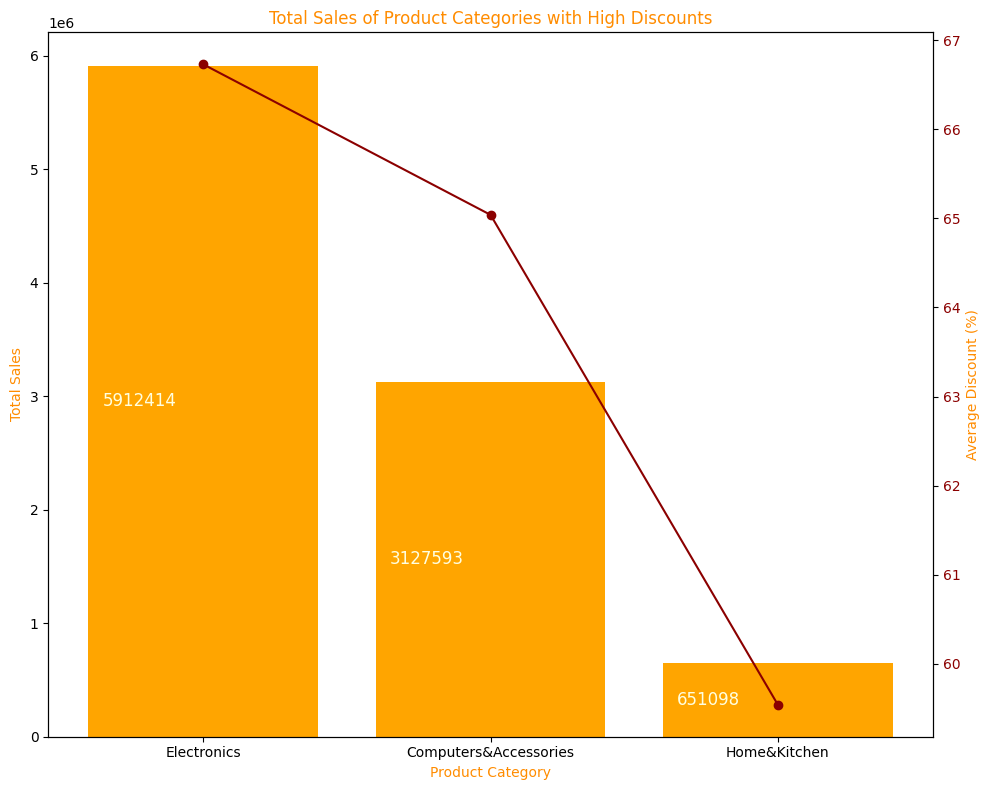

In [242]:
#Plot a chart to show total sales of most sales product categories with high discounts
plt.figure(figsize=(10,8))
bars = plt.bar(most_sales_categories.index, most_sales_categories['Total Sales'], color='orange')
plt.title('Total Sales of Product Categories with High Discounts', color='darkorange')
plt.xlabel('Product Category', color='darkorange')
plt.ylabel('Total Sales', color='darkorange')
plt.xticks(rotation=0, ha='center')

# Add sales values inside the bars at the center-top
for bar in bars:
    yval = bar.get_height()
    # Positioning the text inside the bar (center of the bar)
    plt.text(bar.get_x() + 0.05, yval / 2,  # Positioning inside the bar
             f'{yval}', ha='left', va='center', fontsize=12, color='lightyellow')

# Add the average discount percentage as a secondary y-axis
ax2 = plt.gca().twinx()
ax2.plot(most_sales_categories.index, most_sales_categories['Average Discount %'], color='darkred', marker='o', linestyle='-')
ax2.set_ylabel('Average Discount (%)', color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkred')

plt.tight_layout()
plt.show()


In [243]:
#Filter to top 10 of most sales products
most_sales_categories_df = high_discount[high_discount['main_category'].isin(most_sales_categories.index)]
most_sales_products = most_sales_categories_df.groupby('product_type')['rating_count'].sum().sort_values(ascending = False)
top_10_products = most_sales_products.head(10)
top_10_products

,rating_count
product_type,
In-Ear,3085010
USBCables,1137952
SmartWatches,770088
PenDrives,756088
HDMICables,532687
WirelessUSBAdapters,360157
On-Ear,334724
Choppers,270563
MicroSD,226920


In [244]:
#Find their discount %
most_sales_discount = most_sales_categories_df.groupby('product_type')['discount_percentage'].mean().round(2)
top_10_products_discount = most_sales_discount[most_sales_discount.index.isin(top_10_products.index)]
top_10_products_discount

,discount_percentage
product_type,
Choppers,60.00
HDMICables,64.20
In-Ear,67.26
MicroSD,65.00
On-Ear,61.40
PenDrives,60.78
SmartWatches,72.57
Stands,75.82
USBCables,65.91


In [245]:
#Concatenate top 10 total sales and discount %
top_10_products = pd.concat([top_10_products, top_10_products_discount], axis=1)
top_10_products = top_10_products.rename(columns={'product_type': 'Product Type', 'rating_count': 'Total Sales', 'discount_percentage': 'Average Discount %'})
top_10_products

,Total Sales,Average Discount %
product_type,,
In-Ear,3085010,67.26
USBCables,1137952,65.91
SmartWatches,770088,72.57
PenDrives,756088,60.78
HDMICables,532687,64.20
WirelessUSBAdapters,360157,60.50
On-Ear,334724,61.40
Choppers,270563,60.00
MicroSD,226920,65.00


In [246]:
#Filter to top 10 of lowest sales products
bottom_10_products = most_sales_products.tail(10)
bottom_10_products

,rating_count
product_type,
HandMixers,550
ElectricGrinders,478
GamingKeyboards,408
InternalHardDrives,362
PhoneCharms,305
ImmersionRods,303
CameraPrivacyCovers,255
SprayBottles,212
MilkFrothers,185


In [247]:
#Find their discount %
lowest_sales_discount = most_sales_categories_df.groupby('product_type')['discount_percentage'].mean().round(2)
bottom_10_products_discount = lowest_sales_discount[lowest_sales_discount.index.isin(bottom_10_products.index)]
bottom_10_products_discount

,discount_percentage
product_type,
CameraPrivacyCovers,77.0
ElectricGrinders,51.0
GamingKeyboards,57.0
HandMixers,64.0
ImmersionRods,57.0
InternalHardDrives,80.0
MilkFrothers,54.0
PhoneCharms,90.0
Projectors,52.0


In [248]:
#Concatenate bottom 10 total sales and discount %
bottom_10_products = pd.concat([bottom_10_products, bottom_10_products_discount], axis=1)
bottom_10_products = bottom_10_products.rename(columns={'product_type': 'Product Type', 'rating_count': 'Total Sales', 'discount_percentage': 'Average Discount %'})
bottom_10_products

,Total Sales,Average Discount %
product_type,,
HandMixers,550,64.0
ElectricGrinders,478,51.0
GamingKeyboards,408,57.0
InternalHardDrives,362,80.0
PhoneCharms,305,90.0
ImmersionRods,303,57.0
CameraPrivacyCovers,255,77.0
SprayBottles,212,57.0
MilkFrothers,185,54.0


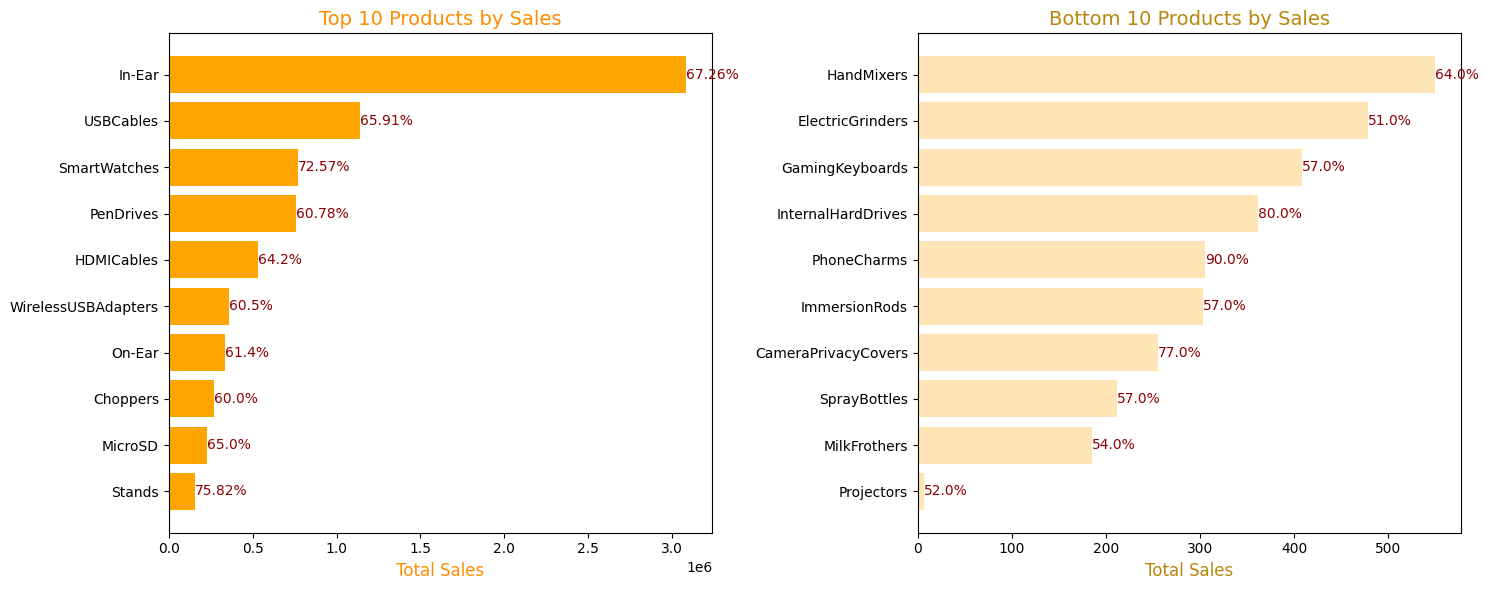

In [249]:
#Plot 2 bar charts side by side for easy comparasion between top 10 and botom 10 products sales and discount %
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Top 10
axes[0].barh(top_10_products.index, top_10_products['Total Sales'], color='orange')
axes[0].set_title('Top 10 Products by Sales', fontsize=14, color='darkorange')
axes[0].set_xlabel('Total Sales', fontsize=12, color='darkorange')
axes[0].invert_yaxis()  # Invert y-axis for better readability

# Add discount percentages on top of the bars
for i, (product, row) in enumerate(top_10_products.iterrows()):
    axes[0].text(row['Total Sales'] + 100, i, f"{row['Average Discount %']}%", va='center', fontsize=10, color='darkred')


# Bottom 10
axes[1].barh(bottom_10_products.index, bottom_10_products['Total Sales'], color='moccasin')
axes[1].set_title('Bottom 10 Products by Sales', fontsize=14, color='darkgoldenrod')
axes[1].set_xlabel('Total Sales', fontsize=12, color='darkgoldenrod')
axes[1].invert_yaxis()  # Invert y-axis for better readability

# Add discount percentages on top of the bars
for i, (product, row) in enumerate(bottom_10_products.iterrows()):
    axes[1].text(row['Total Sales'] + 0, i, f"{row['Average Discount %']}%", va='center', fontsize=10, color='darkred')

plt.tight_layout()
plt.show()




> Even though top 10 and bottom 10 products are both in most sales categories, there is a massive difference in total sales between them. Therefore, The inventory for the top 10 products shall be prioritized for replenishment in preparation for the upcoming discount promotions, while the sales performance of the bottom 10 products might be enhanced through further increased discounting.



# **5th Aspect**: *Common issues that customers raise in low-rated products*

In [250]:
low_rating_review = low_rating['review_title'].str.lower()
low_rating_review.values

array(['not good,no voice recognition, no pointer ray as in original lg remote. these features are not included,best product,not working properly,doesnt work, dont buy,it doesn’t have pointer,not working properly,just perfect',
       'very good prodat,battery life is 0 day,good,where is switch on button?,saman kharab hai,do not purchase totally waste of time and money.,bhot gandhi h ye watch,good 👍 nice',
       "its is good but battery life is very poor,heart rate sanser and battery backup,nice product,good product within small price range,poor.,cool product,gets disconnected , time n data doesn't updates automatically,it's good deal at 849/- works fine for first few days",
       'nice product i recommend to buy,do not buy!! defective product,wast of money,very very bad portable,waste of money its not working properly',
       "portable but not much powerful,not so good. power back up is very poor.its more like a toy for my 9 years old girl.,500 rs ok,don't be fooled by ratings, not

In [251]:
low_rating[['main_category','product_type']]

,main_category,product_type
263,Electronics,RemoteControls
545,Electronics,SmartWatches
550,Electronics,SmartWatches
1243,Home&Kitchen,HandBlenders
1286,Home&Kitchen,JuicerMixerGrinders
1309,Home&Kitchen,FanHeaters
1315,Home&Kitchen,VacuumSealers
1356,Home&Kitchen,VacuumSealers
1449,Home&Kitchen,WaterPurifierAccessories


In [252]:
# Flatten the feedbacks by splitting by comma
split_feedbacks = []

for feedback in low_rating_review:
    # Split each feedback by commas and extend the split result into the list
    split_feedbacks.extend(feedback.split(','))

# Count the frequency of each string (after splitting by comma)
string_counts = Counter(split_feedbacks)

string_counts

Counter({'not good': 1,
         'no voice recognition': 1,
         ' no pointer ray as in original lg remote. these features are not included': 1,
         'best product': 1,
         'not working properly': 2,
         'doesnt work': 1,
         ' dont buy': 1,
         'it doesn’t have pointer': 1,
         'just perfect': 1,
         'very good prodat': 1,
         'battery life is 0 day': 1,
         'good': 1,
         'where is switch on button?': 1,
         'saman kharab hai': 1,
         'do not purchase totally waste of time and money.': 1,
         'bhot gandhi h ye watch': 1,
         'good 👍 nice': 1,
         'its is good but battery life is very poor': 1,
         'heart rate sanser and battery backup': 1,
         'nice product': 1,
         'good product within small price range': 1,
         'poor.': 1,
         'cool product': 1,
         'gets disconnected ': 1,
         " time n data doesn't updates automatically": 1,
         "it's good deal at 849/- works fine 

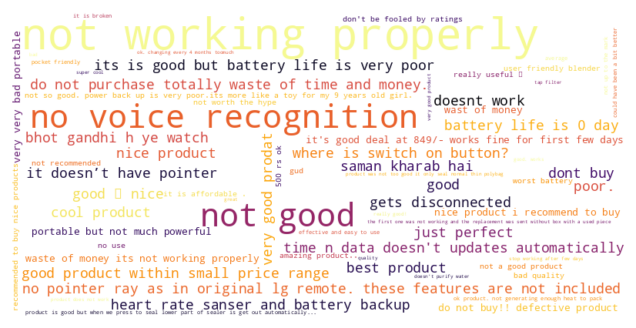

In [253]:
#Create a word cloud for visualization
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap= 'inferno').generate_from_frequencies(string_counts)

# Plot the word cloud
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 4. Key Insights & Recommendations

- Summarize findings and provide actionable recommendations for Amazon’s discount strategies.
- Suggest improvements based on data-driven conclusions.
- Highlight potential optimizations for pricing and marketing strategies.




> Although Discounts and Prices exhibit a limited influence on customer satisfaction, their impact is relatively minor compared to the substantial effect of Unreliable Quality and Malfunctioning Products on Customer Ratings which explains for the concern of the low rating appearance despite high discounts on products.


> For high-ticket products, Budget-friendly price along with High-grade quality will strengthen total sales and raise products' ratings.



> Electronics, Computers & Accessories and Home & Kitchen are the 3 most beneficial from discount promotion since their total sales rank highest across 8 discount-applicable categories. In which, an enormous gap in sales between top 10 with the most sales and bottom 10 with the least sales is clearly noticeable. The top 10 products which should be significantly replenished in preparation for the upcoming discount promotion, while the bottom 10 products with weakest sales volume should either upgrade their quality nor have their discount percentages increased further to drive sales performance.


> At the low-rated product range, Defective and Dysfunctional products appear to present critical concern. There are several approachs to improve this matter, including Enhance Quality Control Processes, Conduct Root Cause Analysis and Provide Clear Return & Refund Policies.










-